In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)

In [4]:
data = pd.read_excel('dataset.xlsx')
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

#### Exploratory Data Analysis

Objectif: comprendre au maximum les données dont on dispose pour définir une stratégie de modélisation.

I - Analyse de la forme:
	§  Identification de la target :  SARS-Cov-2 exam result
	§ Nombre des lignes et de colonnes : (5644, 111) 
	§ Identification des valeurs manquantes** : Beaucoup de Nan(moitie des variables > 90% de NaN) ,2 groupes de donnees ,76% -> Test ,89% -> taux sanguins
	§ Types de variables : qualitatives 70,quantitative :41

II - Analyse du fond:
	§ Visualisation de la target (histogramme/boxplot)
     - 10% de positifs (558/5000)
     
	§ Compréhension des différentes variables (recherche)
    1- variables continues standardisees,skewed(asymetriques),test sanguin
    2- age quantite =: difficile d'interpreter ce graphique,clairement ces donnees ont ete traitees ,on pourrait penser 0-5 mais cela pourrait aussi etre une transformation mathematique.On peut pas savoir car la personne qui a mit ce dataset ne le precise nul part .Mais ca n'est pas tres important
    3- variable qualitative : binaire(0,1),viral,Rhinovirus qui semble tres elevee
    
	§ Visualisation des relations ou Relation variable /target : features/target
	-target /blood : les taux de Monocytes,Platelts,leukocytes semblent lies au covid-19 => hypothes a tester
    -target/age : les individus de faible age sont tres peu contaminer ? => attention on ne connait pas l'age ,et on ne sait pas de quand date le dateset ('sil s'agit des enfant on sait que les enfants sont touches autant que les adultes).En revanche cette variable pourra etre interessant pour la comparer avec les resultats de tests sanguins.
    
    target /viral : les doubles maladies sont tres rare.Rhinovirus/Entrerovirus positif - covid-19 negatif ? -> hypothese a tester ? mais il est possible que la region ait subie une epidemie de ce virus.De plus on peut tres bien avoir 2virus en meme temps.Tout ca  n'a aucun lien avec le covid-19 virus.
    
    CONCLUSION INITIALES :
    -Beaucoup de donnees manquantes (au mieux on garde 20% du dataset)
    -2 groupes de donnees interessantes(viral,sanguin)
    -Presaue pas de variable "discrimante" pour distinguer les cas positifs/negatifs, ce qui nous permet de dire qu'il n'est pas  vraiment approprie de vouloir predire si un individu est atteint du covid-19 en se basant sur ces simples test sanguins.Mais c'est pas grave ,il faut quand meme poursuivre l'analyse pour essayer de voir ce qu'on peut apprendre.Rome ne s'est fait pas fait un jour et le Machine Learning ca ne peut pas transformer l'eau en vin.Mais ca  n'est pas une raisonpour abandonner le projet.Et ca ,c'est la chose la plus importante que vous devez retenir de cette video: Un bon data scientist il va jusqu'au bout de sa mission.Si en cours de route ,on se rend compte que l'histoire n'est pas aussi simple qu'on pouvait l'esperer,alors il faut pouvoir le demontrer de facon robuste en allant jusqu'au bout des choses.
    -Donc maintenant quant meme quelque chose de positif : on a peut identifier des cariables interssantes qui sont susceptibles de jouer un role non negligeable(monocyte etc )
    
    II-3 - Analyse plus detaille:
            -Relation Variable /Variables :
                + blood_data / blood_data : certaines variable sont tres correles +0.9 (a surveiller plus tard)
                + blood_data /age : tres faible correlation entre l'age et taux sanguins
                + viral /viral : influenza rapid test donne de mauvais resultats,il faudra peut etre la laisser tomber 
                + relation maladie /blood data : les taux sanguins malade etcovid-19 sont fdifferent
                + relation hospitalisation /est malade:
                + relation hospitalisation /blood:interessant dans le cas ou on voudrait predire dans quelle service un patient devrait aller

            **-NaN analyse ** viral: 1350(92/8),blood :600(87/13),both :90
    
   Hypothese nulle (H0)
    -les individus atteints du covid-19 ont des taux de leukocytes,Monocytes,Platelets significativement differentindividus positif et negatifs
        --*H0 =les taux moyens sont EGAUX chez les 
    -Les individus atteints d'une quelconque maladie des taux significativement differents
    § Identification des outliers


Pre-processing

Objectif: transformer le data pour le mettre dans un format propice au machine learning

	§ Création du Train Set / Test Set
	§ Élimination des NaN : dropna(), imputation, colonne"vides"
	§ Encodage
	§ Suppression des outliers néfastes au modèle
	§ Feature selection
	§ Feature engineering
	§ Feature scaling

Modelling

Objectif: développer un modèle de machine learning capable de répondre a l'objectif final.

	§ Définir une fonction d'évaluation
	§ Entrainement de différents modèles
	§ Optimisation avec GridSearchCV
	§ Analyse des erreurs et retour au Preprocessing / EDA
           Learning Curve et prise de décision


##### Analyse de la forme des donnees

In [5]:
df =data.copy()

In [6]:
df.shape

(5644, 111)

<Axes: >

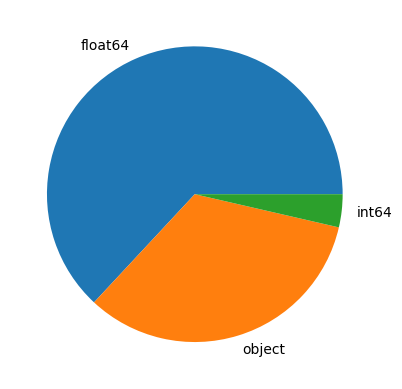

In [7]:
df.dtypes.value_counts().plot.pie()

<Axes: >

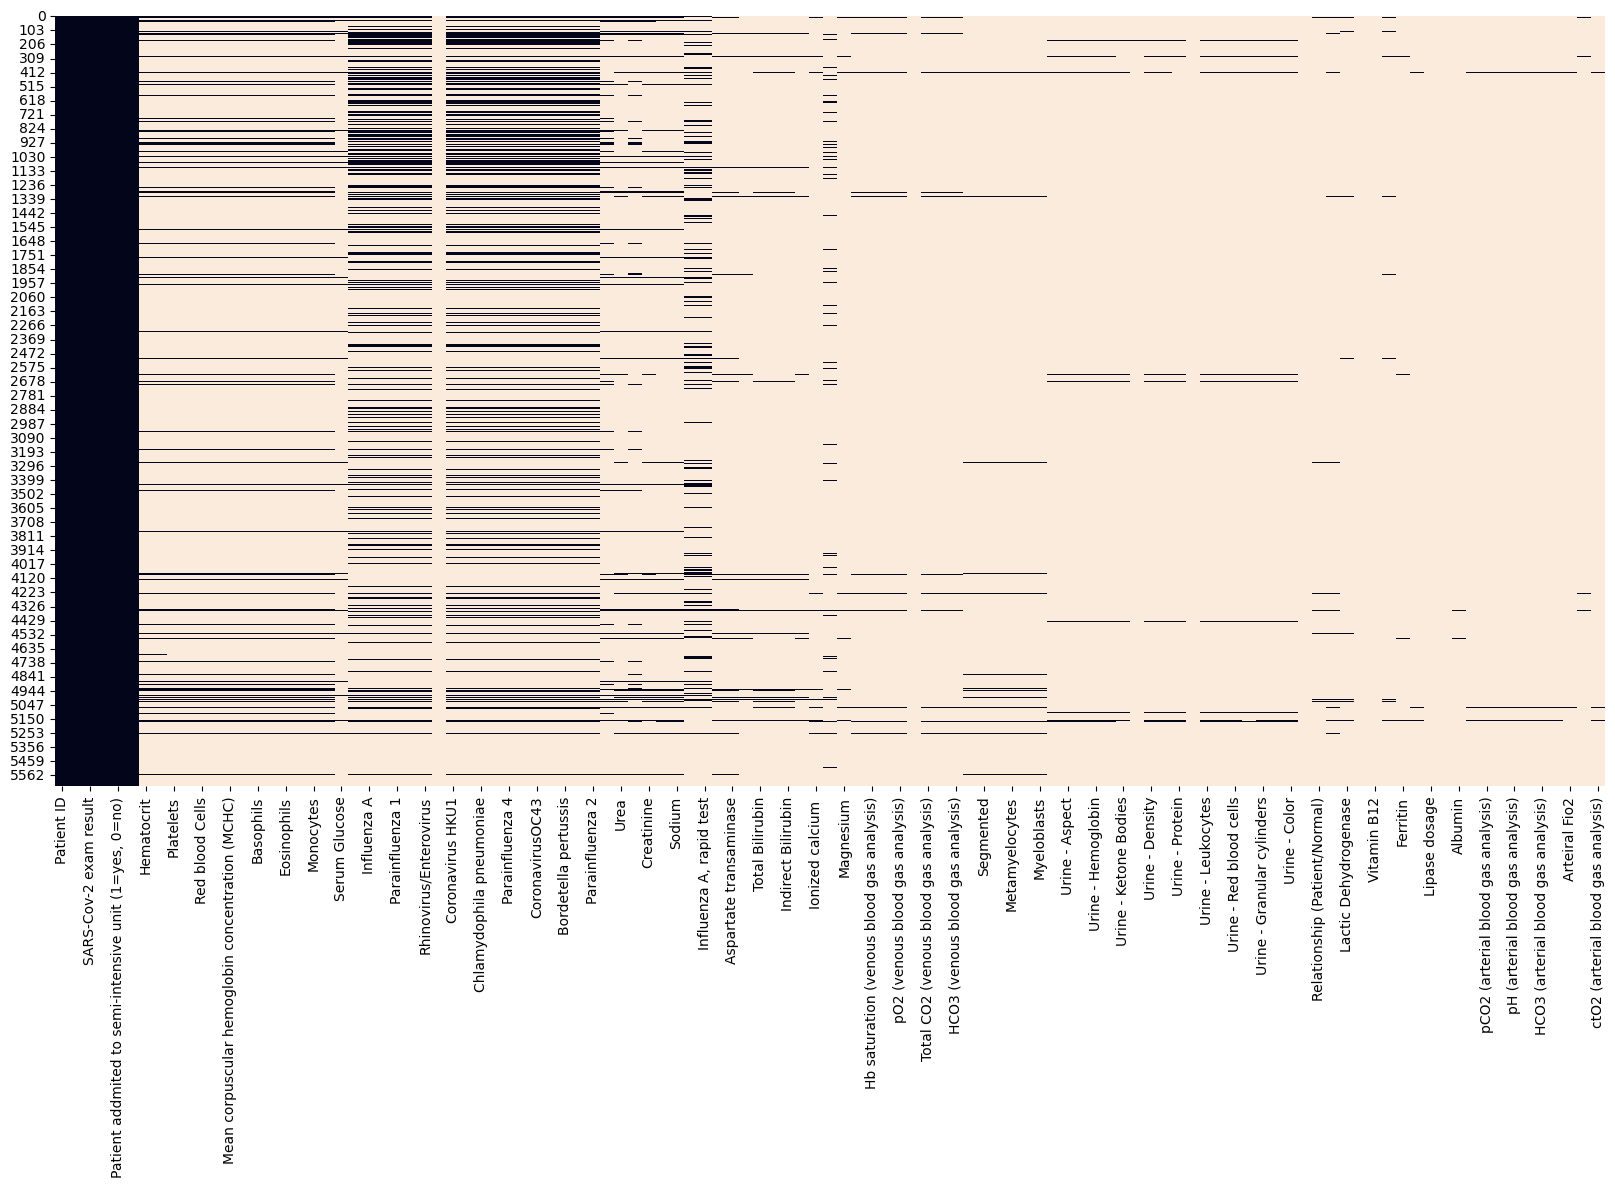

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [9]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

### Analyse de Fond

###### 1. Visualisation initiales -Elimination des colonnes inutiles

In [10]:
df= df[df.columns[df.isna().sum()/df.shape[0] <0.9]]

In [11]:
df

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0     44477f75e8169d2                    13               negative   
1     126e9dd13932f68                    17               negative   
2     a46b4402a0e5696                     8               negative   
3     f7d619a94f97c45                     5               negative   
4     d9e41465789c2b5                    15               negative   
...               ...                   ...                    ...   
5639  ae66feb9e4dc3a0                     3               positive   
5640  517c2834024f3ea                    17               negative   
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0            NaN        NaN                    NaN              NaN   
1      -0.022340  -0.517413               0.010677         0.102004   
2            NaN        NaN                    NaN              NaN   
3            NaN        NaN                    NaN              NaN   
4            NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
5639         NaN        NaN                    NaN              NaN   
5640         NaN        NaN                    NaN              NaN   
5641         NaN        NaN                    NaN              NaN   
5642         NaN        NaN                    NaN              NaN   
5643    0.541564  -0.906829              -0.325903        

<Axes: >

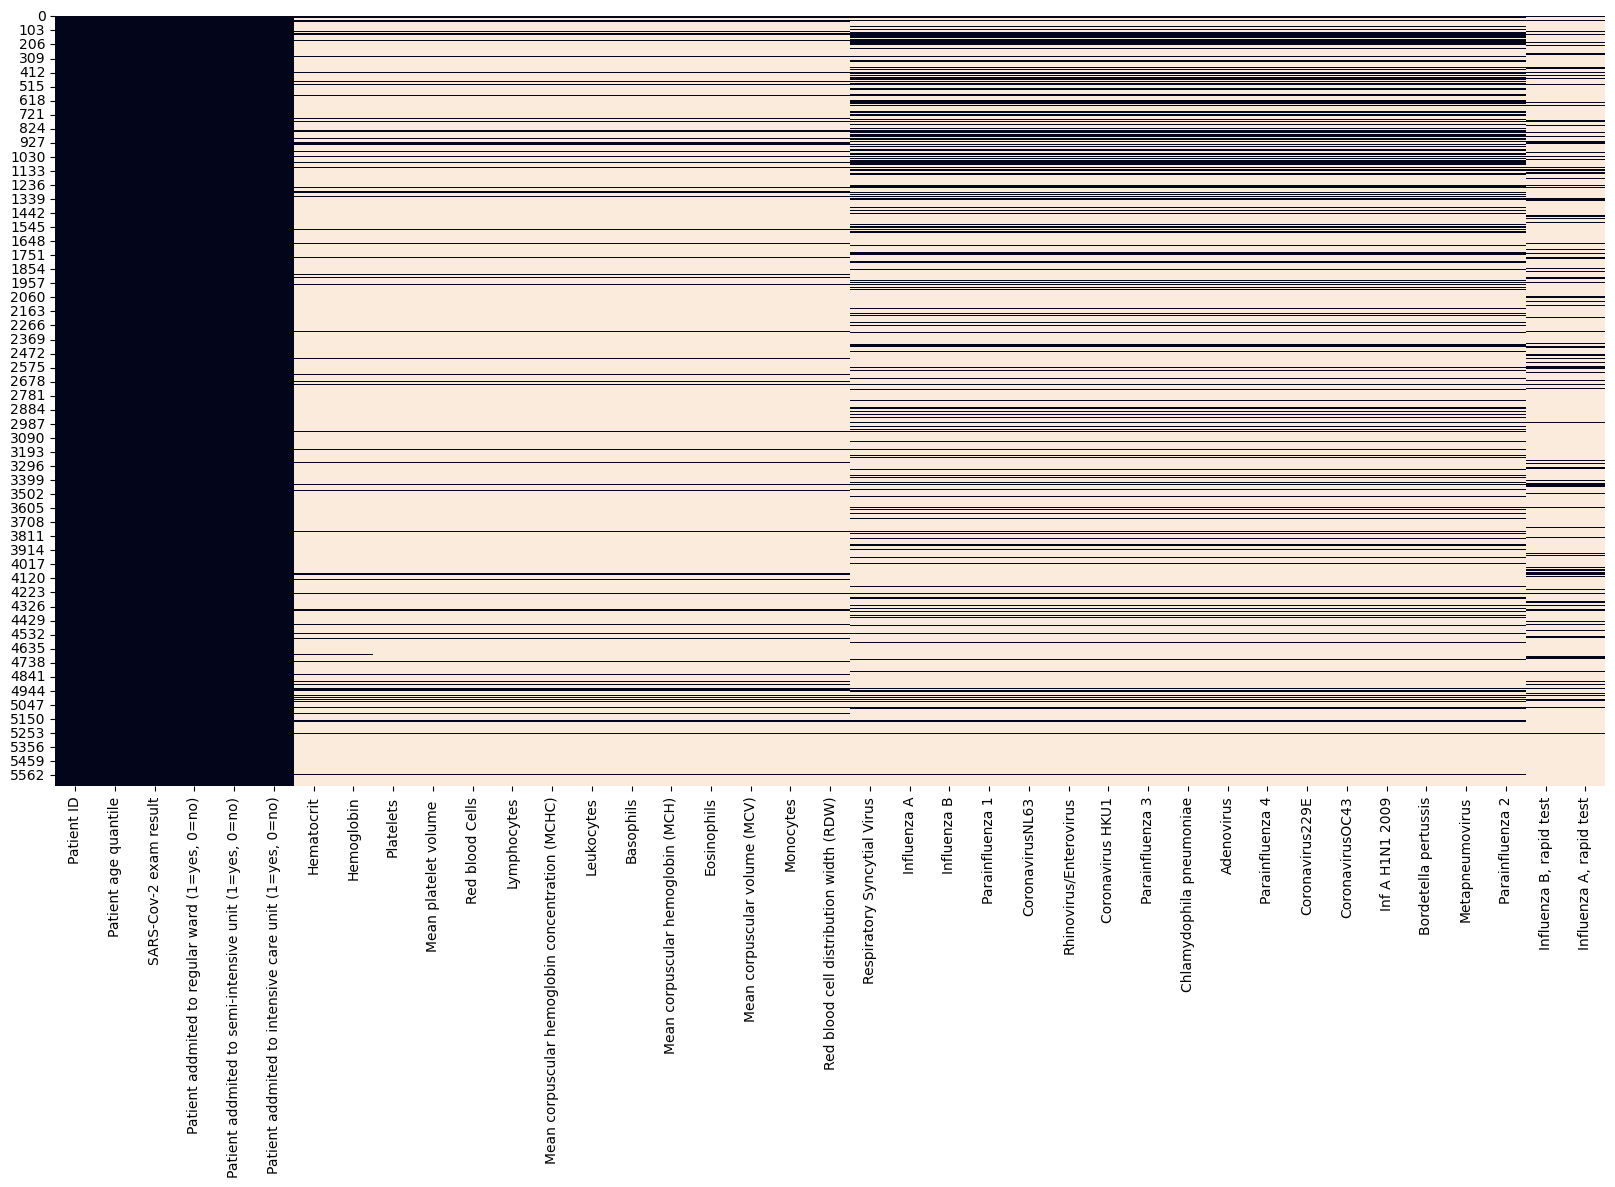

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [13]:
df = df.drop('Patient ID',axis=1)

In [14]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

#### Examen de la colonne target

In [15]:
df['SARS-Cov-2 exam result'].value_counts(normalize=True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

###### histogrammes des variables continues

C:\Users\AD\AppData\Local\Temp\ipykernel_1316\2777817021.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

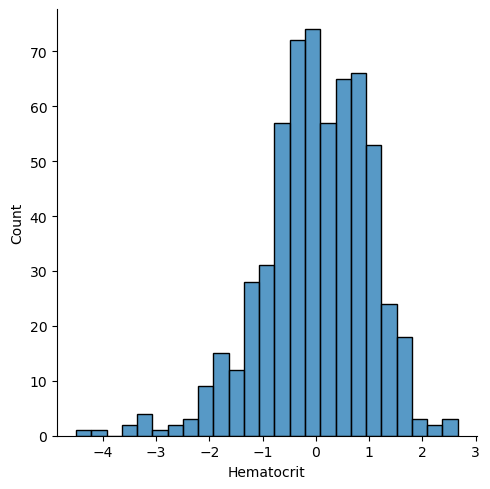

<Figure size 640x480 with 0 Axes>

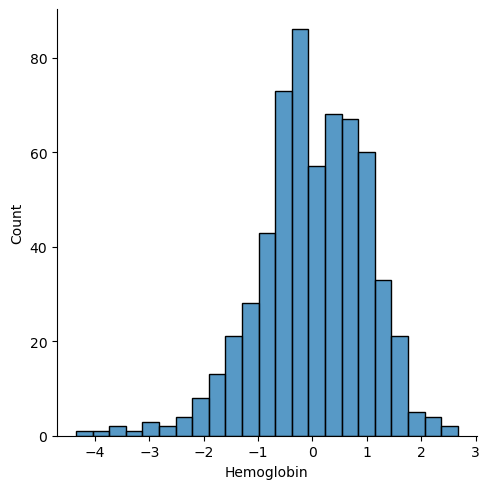

<Figure size 640x480 with 0 Axes>

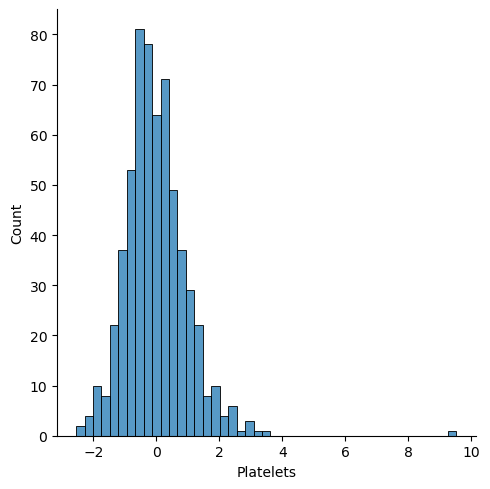

<Figure size 640x480 with 0 Axes>

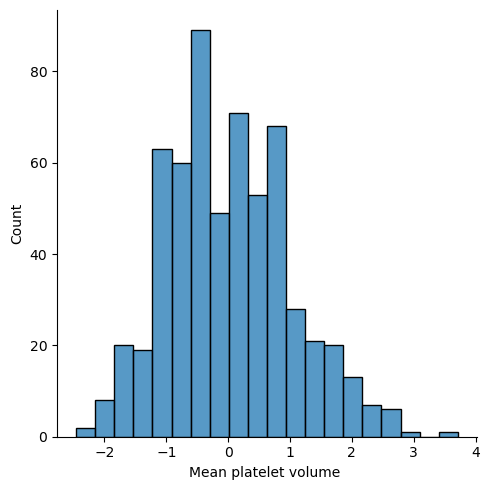

<Figure size 640x480 with 0 Axes>

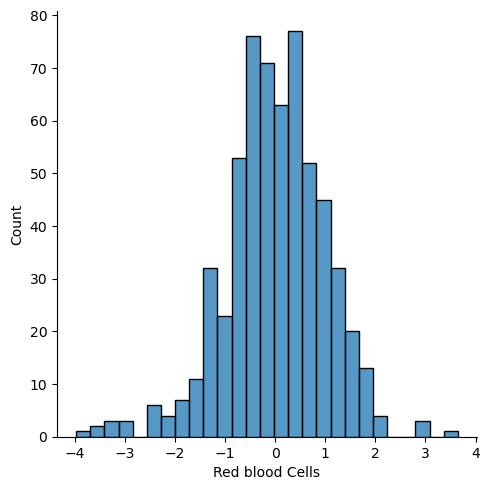

<Figure size 640x480 with 0 Axes>

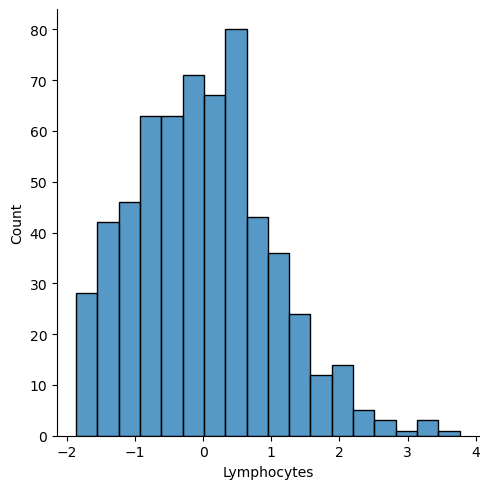

<Figure size 640x480 with 0 Axes>

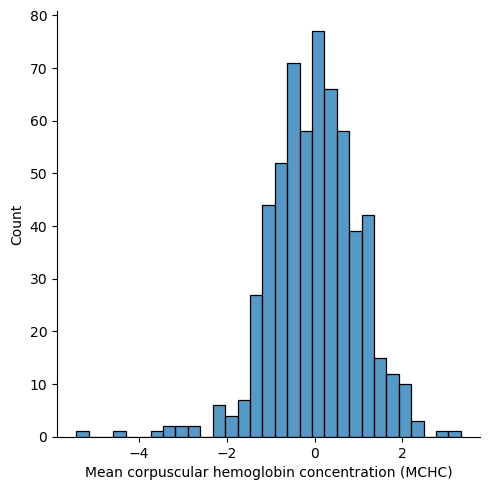

<Figure size 640x480 with 0 Axes>

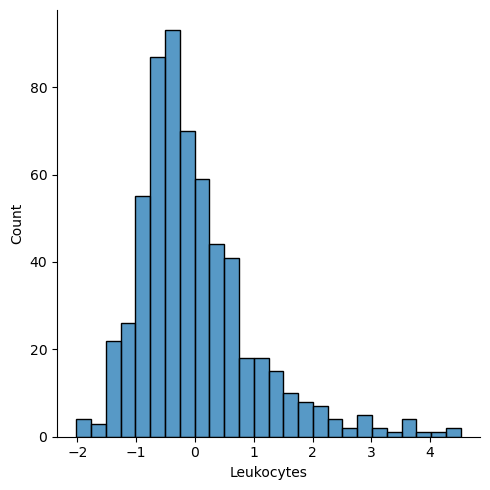

<Figure size 640x480 with 0 Axes>

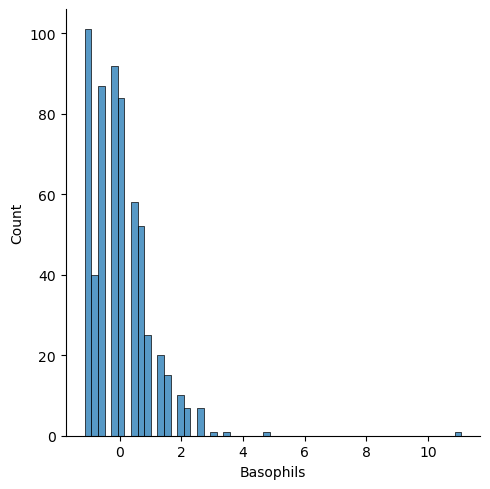

<Figure size 640x480 with 0 Axes>

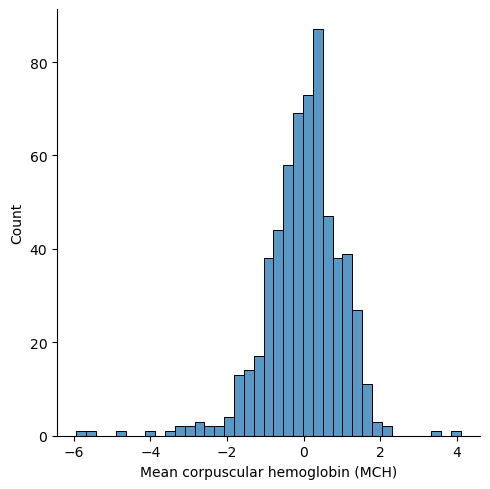

<Figure size 640x480 with 0 Axes>

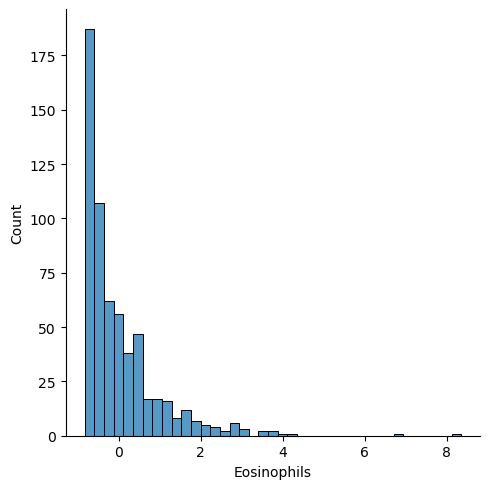

<Figure size 640x480 with 0 Axes>

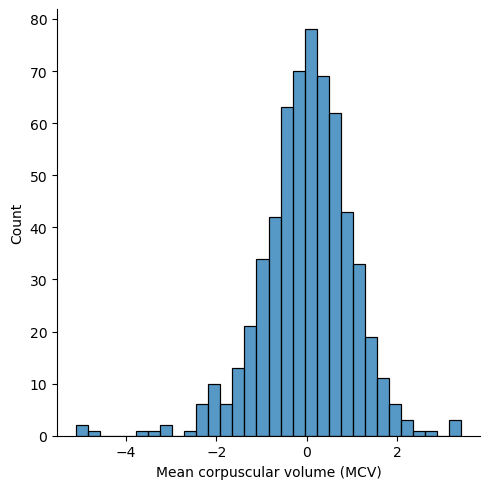

<Figure size 640x480 with 0 Axes>

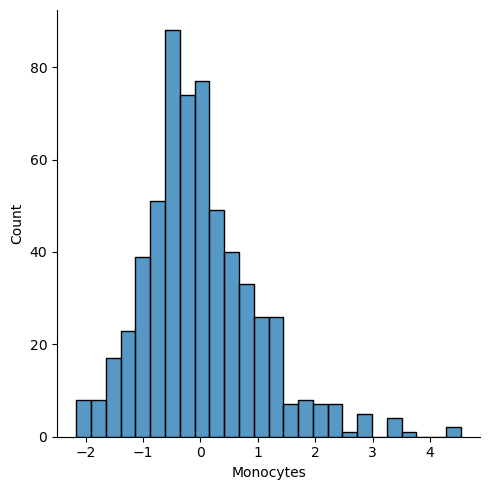

<Figure size 640x480 with 0 Axes>

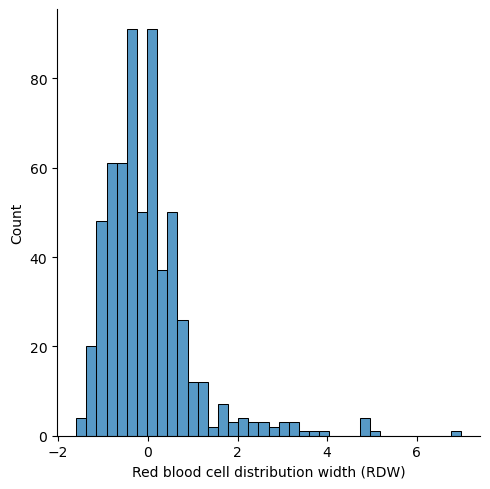

In [16]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.displot(df[col])

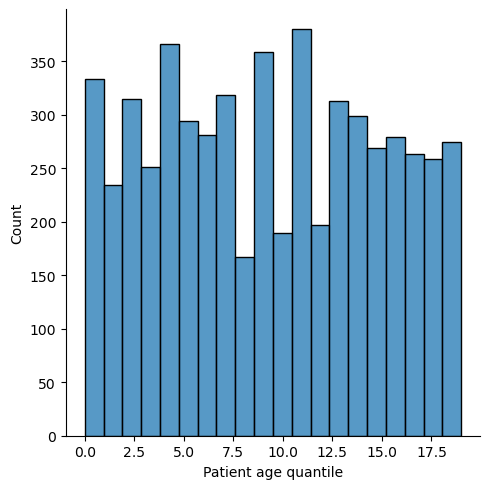

In [17]:
sns.displot(df['Patient age quantile'],bins=20)

In [18]:
df['Patient age quantile'].value_counts()

11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: Patient age quantile, dtype: int64

#### Variable Qualitatives

In [19]:
 for col in df.select_dtypes('object'):
    print(f'{col:-<50},{df[col].unique()}')
 

SARS-Cov-2 exam result----------------------------,['negative' 'positive']
Respiratory Syncytial Virus-----------------------,[nan 'not_detected' 'detected']
Influenza A---------------------------------------,[nan 'not_detected' 'detected']
Influenza B---------------------------------------,[nan 'not_detected' 'detected']
Parainfluenza 1-----------------------------------,[nan 'not_detected' 'detected']
CoronavirusNL63-----------------------------------,[nan 'not_detected' 'detected']
Rhinovirus/Enterovirus----------------------------,[nan 'detected' 'not_detected']
Coronavirus HKU1----------------------------------,[nan 'not_detected' 'detected']
Parainfluenza 3-----------------------------------,[nan 'not_detected' 'detected']
Chlamydophila pneumoniae--------------------------,[nan 'not_detected' 'detected']
Adenovirus----------------------------------------,[nan 'not_detected' 'detected']
Parainfluenza 4-----------------------------------,[nan 'not_detected' 'detected']
Coronavirus2

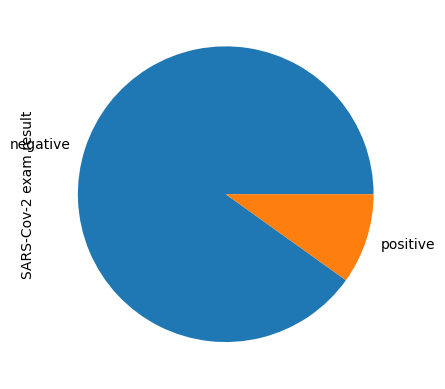

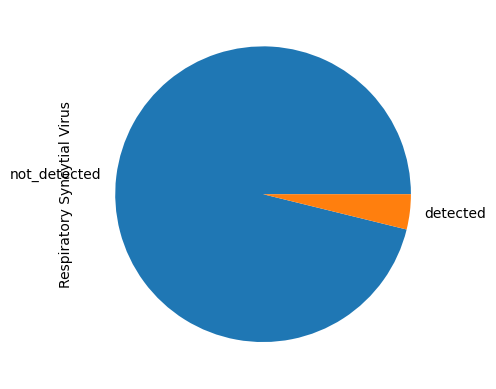

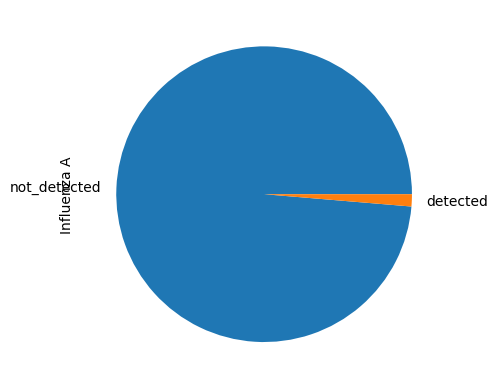

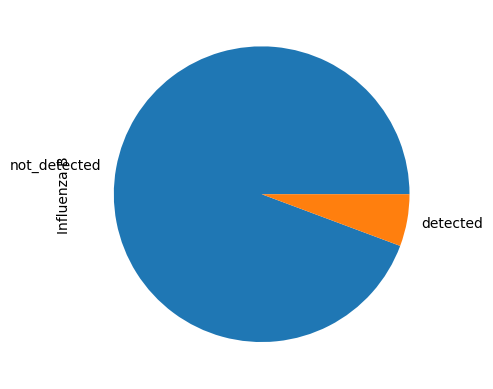

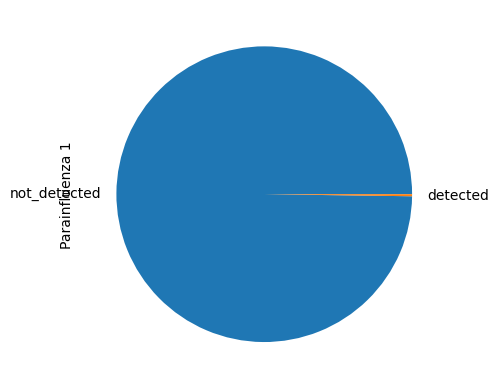

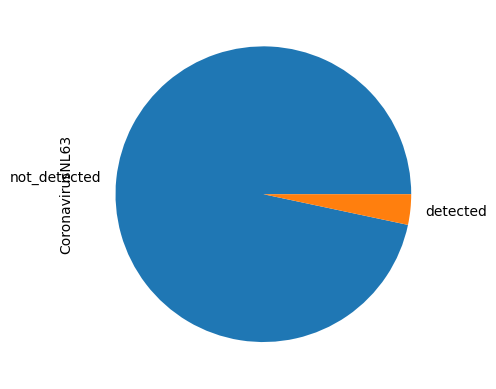

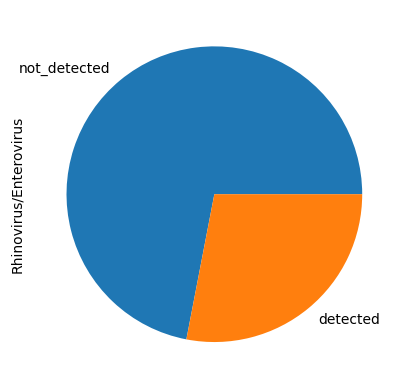

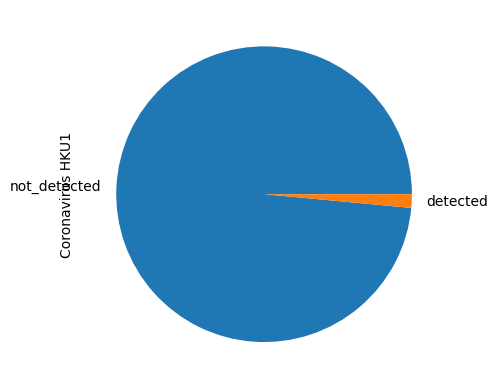

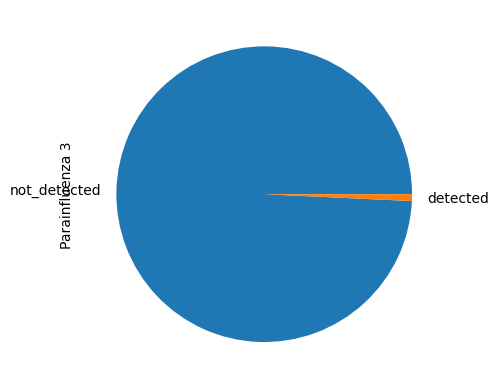

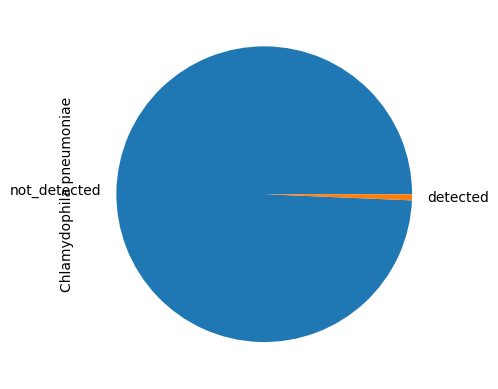

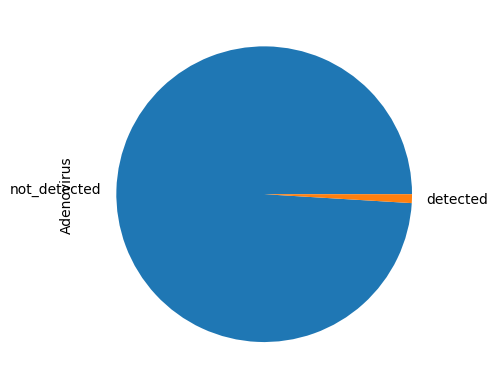

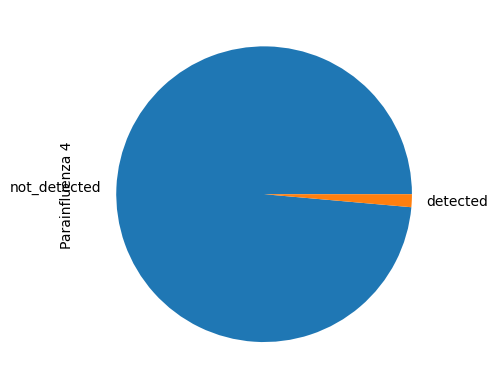

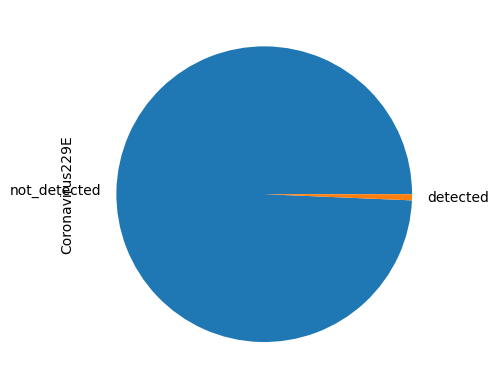

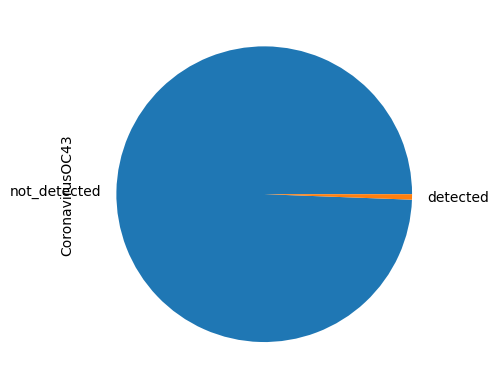

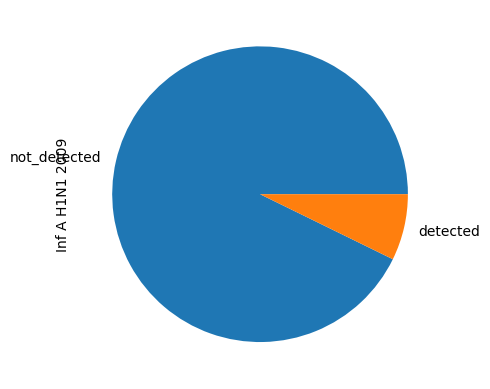

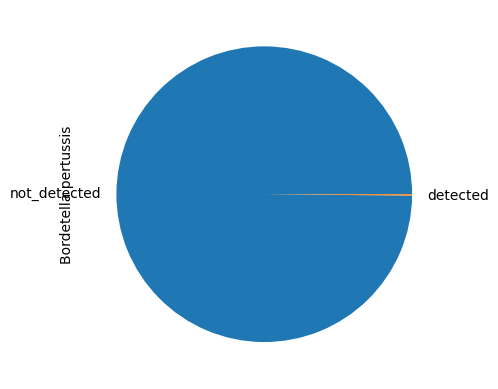

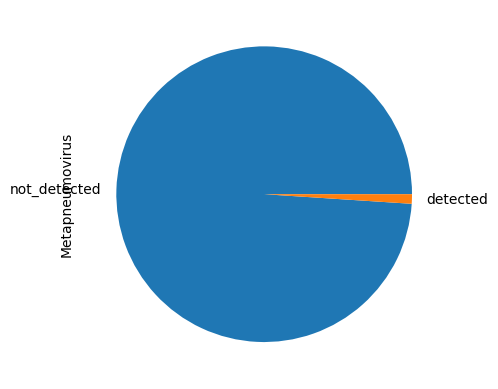

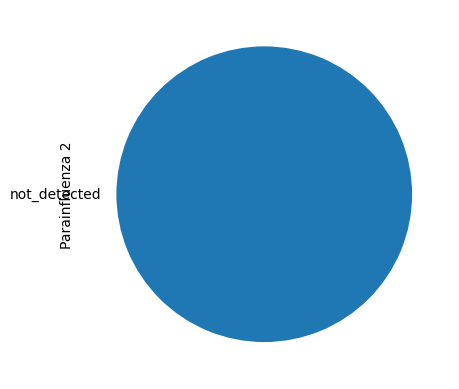

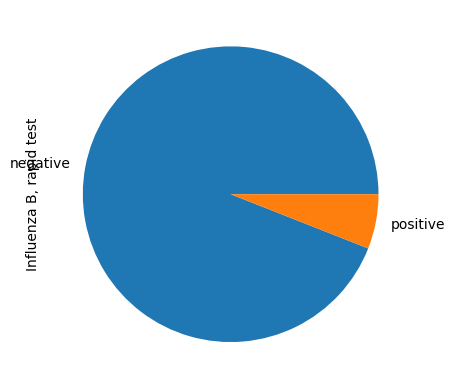

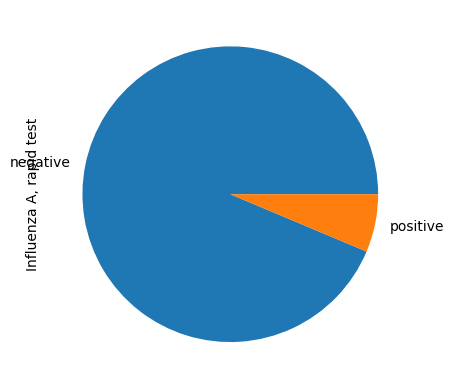

In [20]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

#### Relation Target /Variables

###### Creation de sous-ensemble positifs et negatifs

In [21]:
positive_df = df[df['SARS-Cov-2 exam result'] == 'positive']

In [22]:
negative_df = df[df['SARS-Cov-2 exam result'] == 'negative']

##### Creation des ensembles Blood et viral

In [23]:
missing_rate =df.isna().sum()/df.shape[0]

In [24]:
blood_columns =df.columns[(missing_rate <0.9) & (missing_rate >0.88)]

In [25]:
viral_columns =df.columns[(missing_rate <0.88) & (missing_rate >0.75)]

## Target /Blood

C:\Users\AD\AppData\Local\Temp\ipykernel_1316\2306652585.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col],label='positive',kde=True)
C:\Users\AD\AppData\Local\Temp\ipykernel_1316\2306652585.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_df[col],label='negative',

C:\Users\AD\AppData\Local\Temp\ipykernel_1316\2306652585.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col],label='positive',kde=True)
C:\Users\AD\AppData\Local\Temp\ipykernel_1316\2306652585.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_df[col],label='negative',

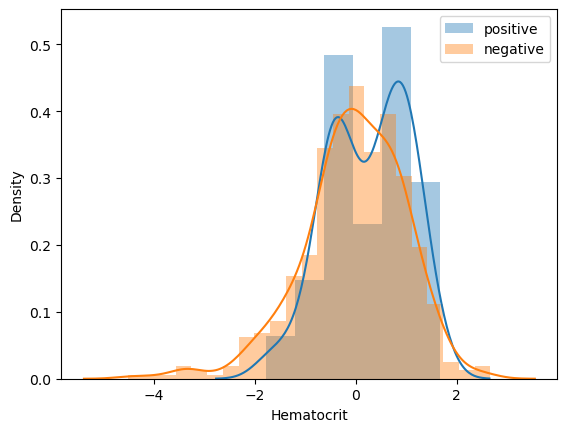

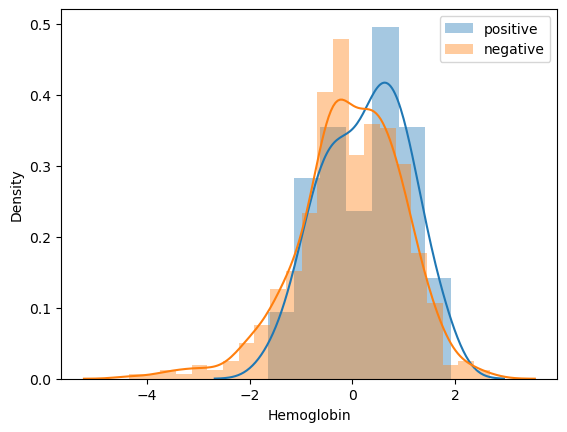

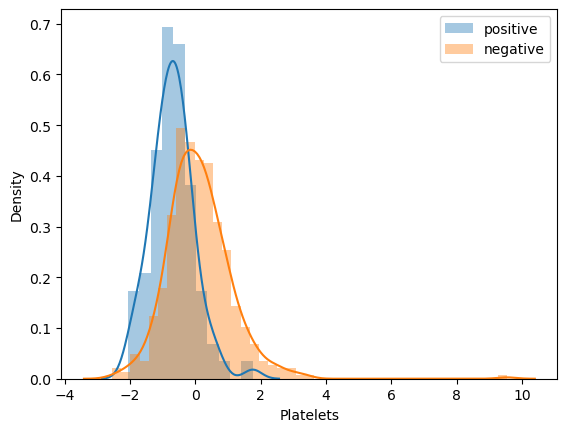

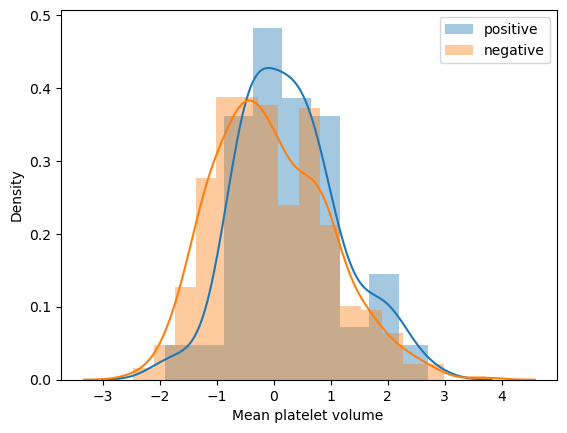

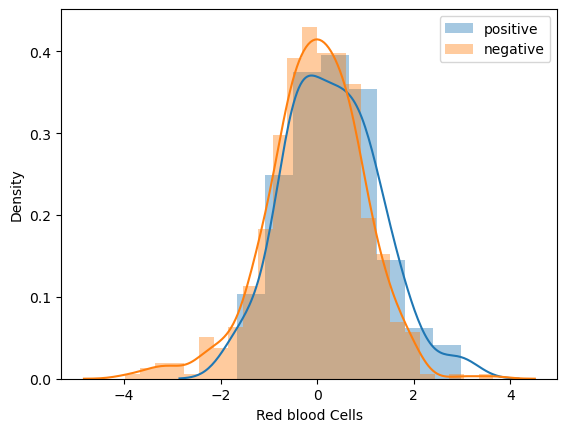

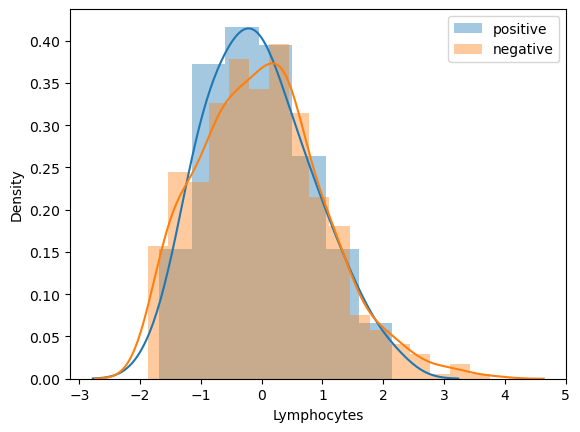

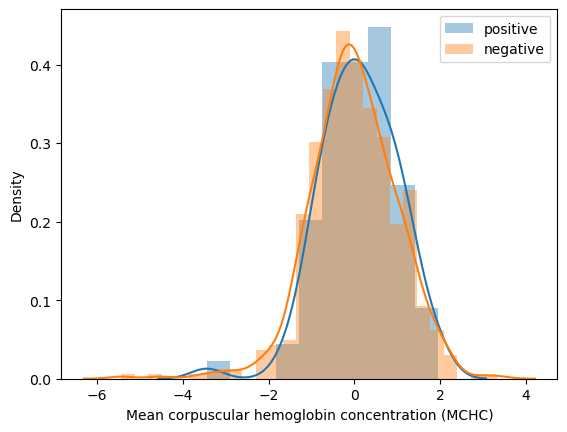

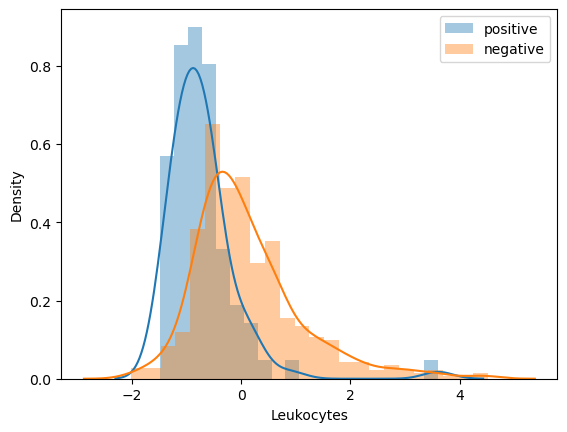

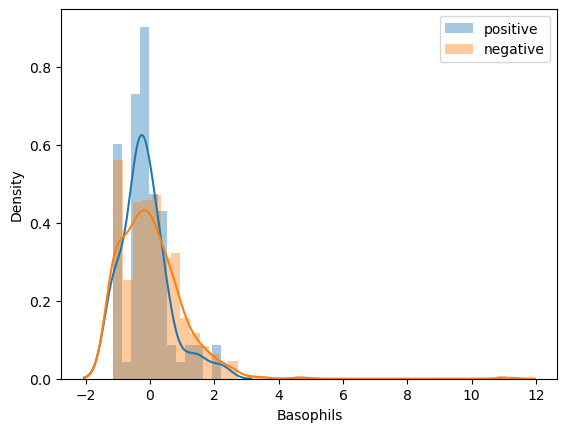

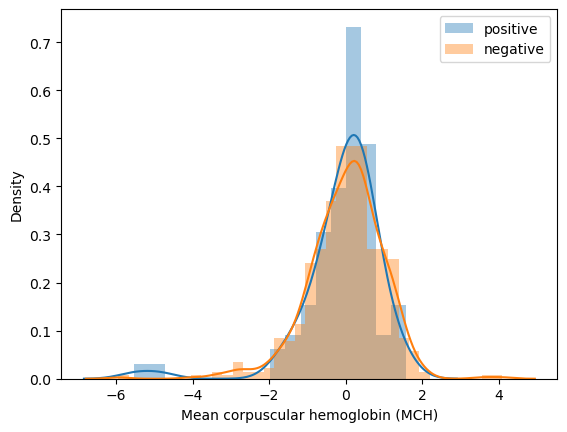

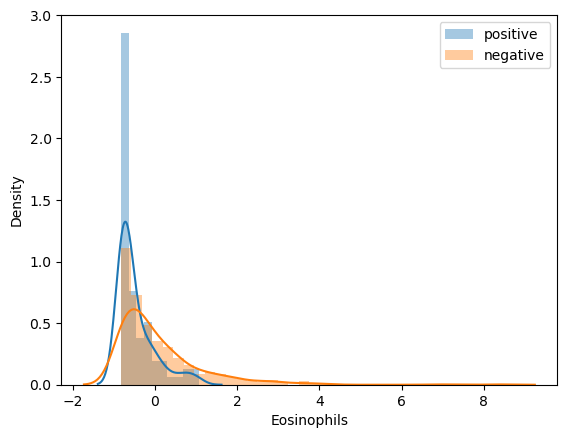

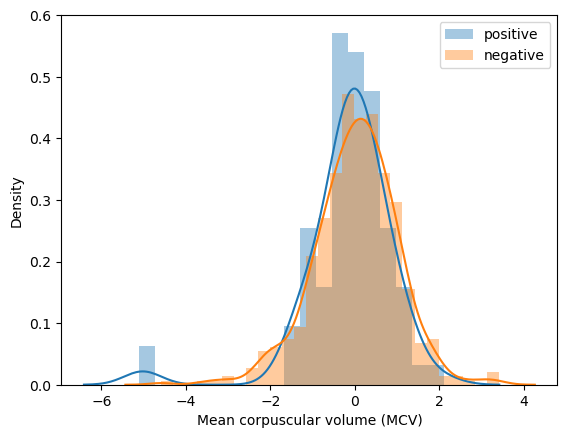

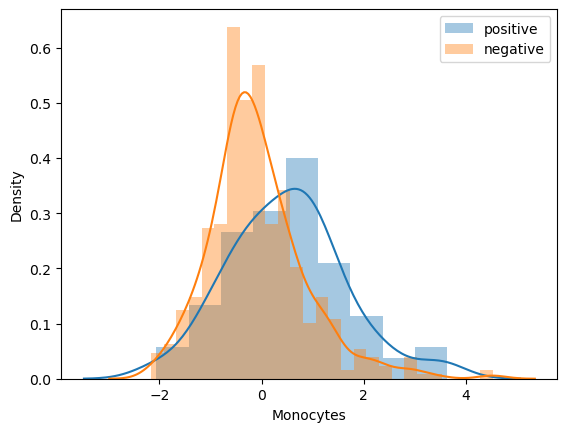

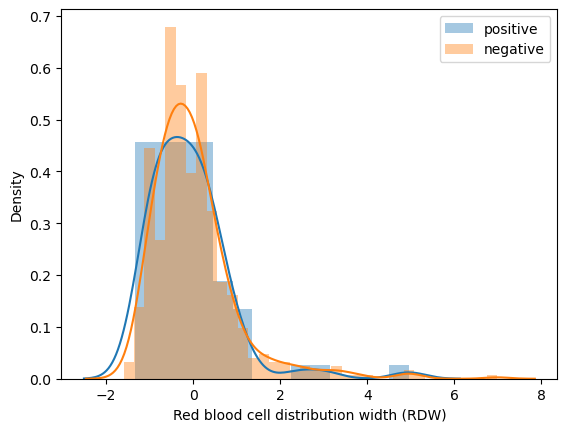

In [26]:
for col in blood_columns:
    plt.figure()
    sns.distplot(positive_df[col],label='positive',kde=True)
    sns.distplot(negative_df[col],label='negative',kde=True)
    plt.legend()

#### Relation Target /age

<Axes: xlabel='Patient age quantile', ylabel='count'>

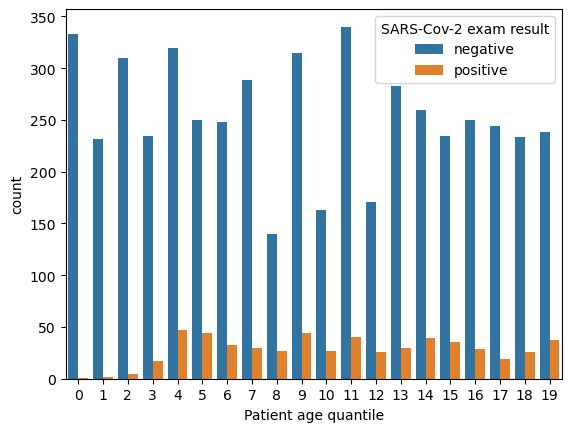

In [27]:
sns.countplot(x='Patient age quantile',hue='SARS-Cov-2 exam result' ,data=df)

#### Relation Target /Viral

In [28]:
pd.crosstab(df['SARS-Cov-2 exam result'],df['Influenza A'])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

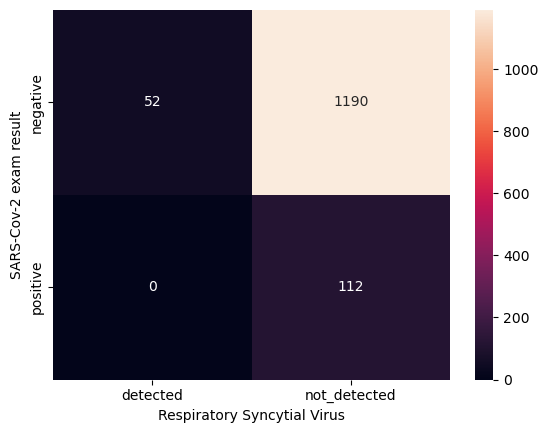

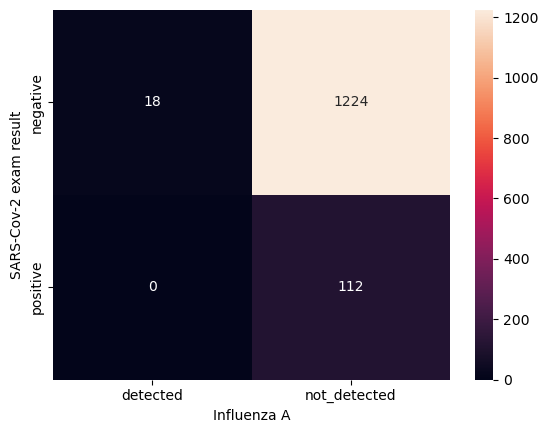

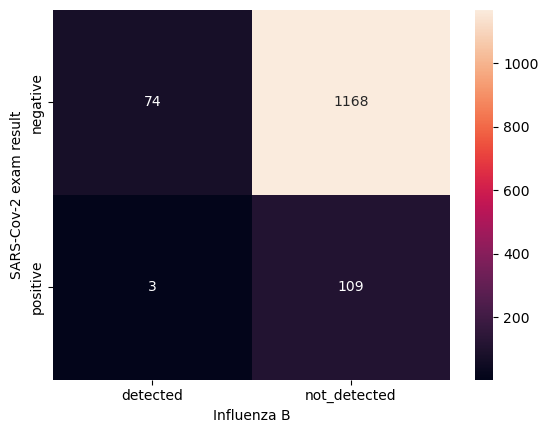

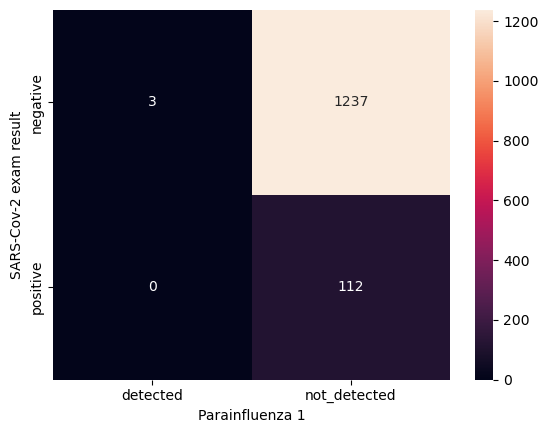

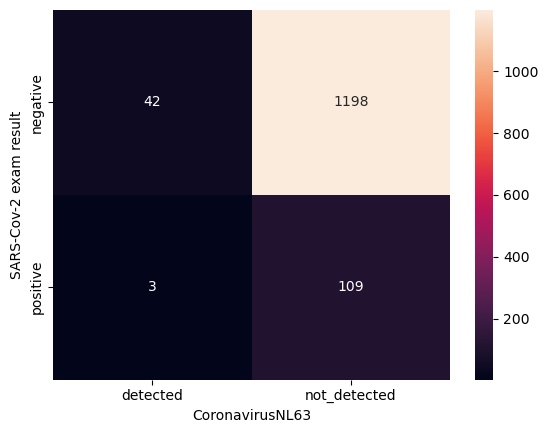

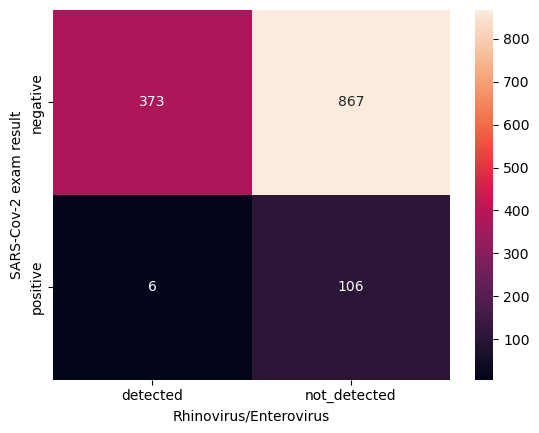

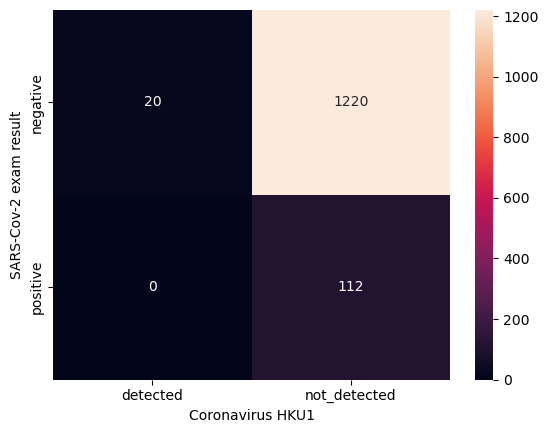

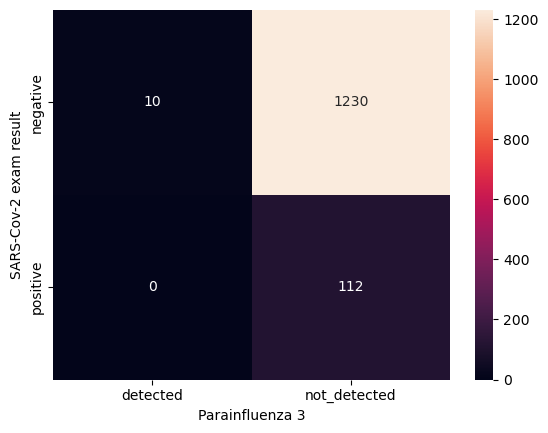

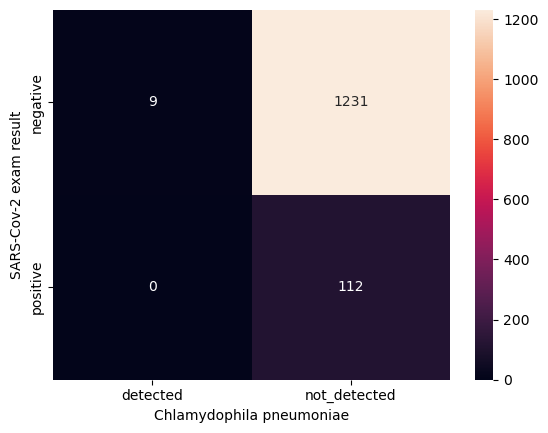

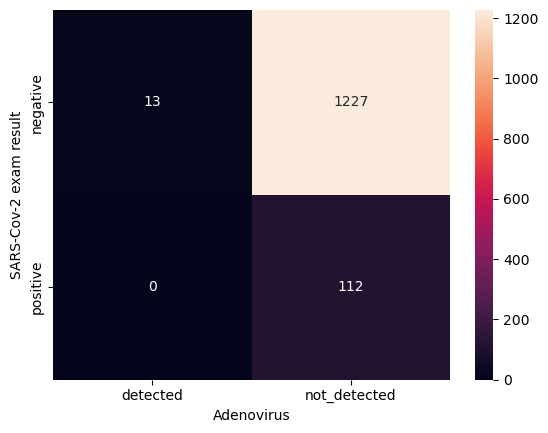

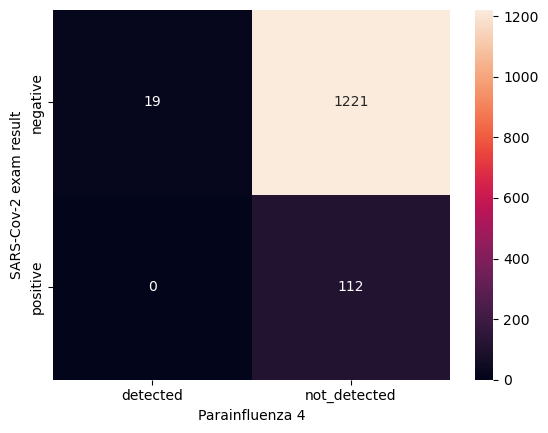

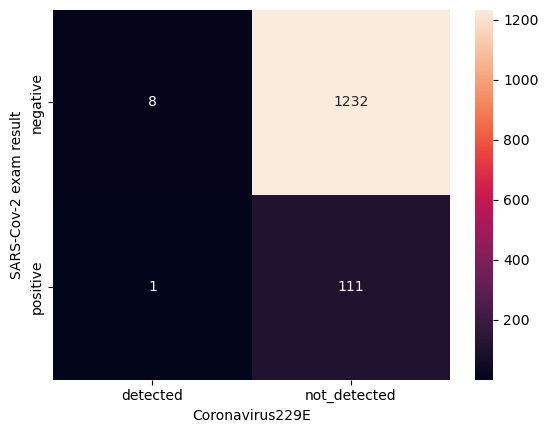

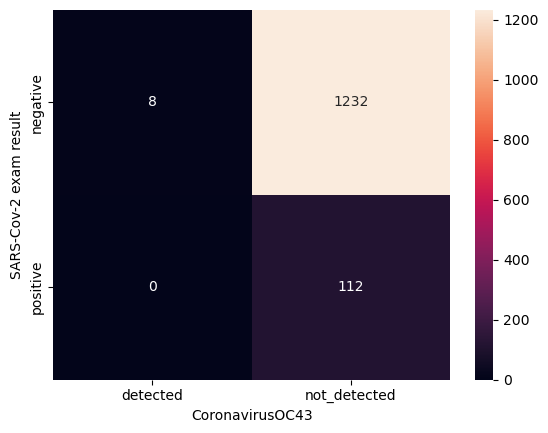

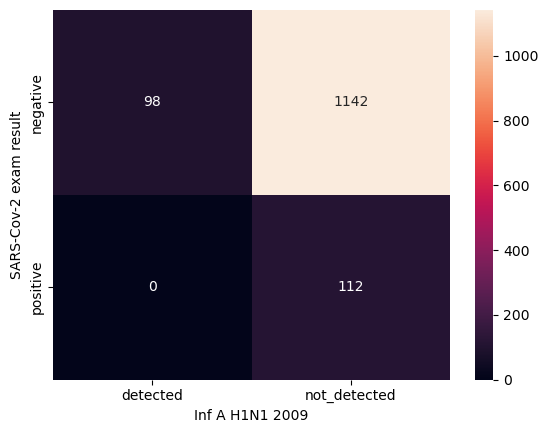

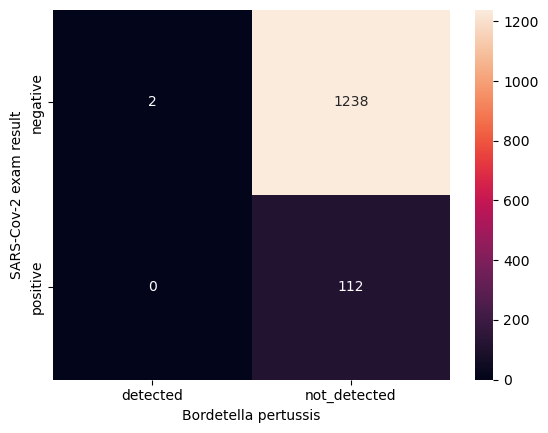

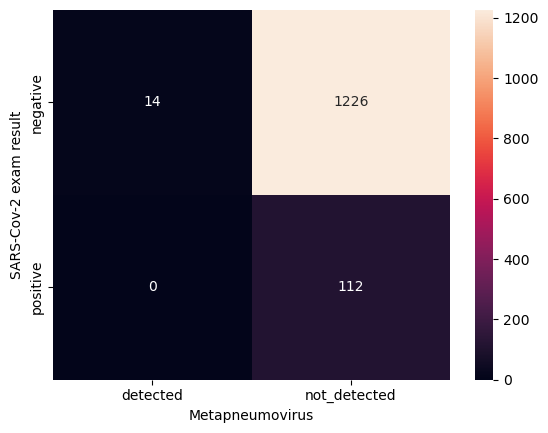

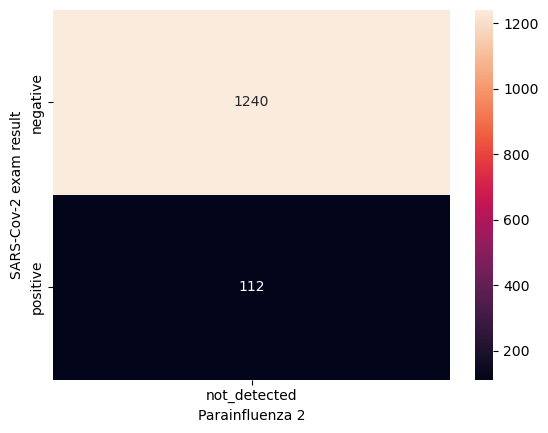

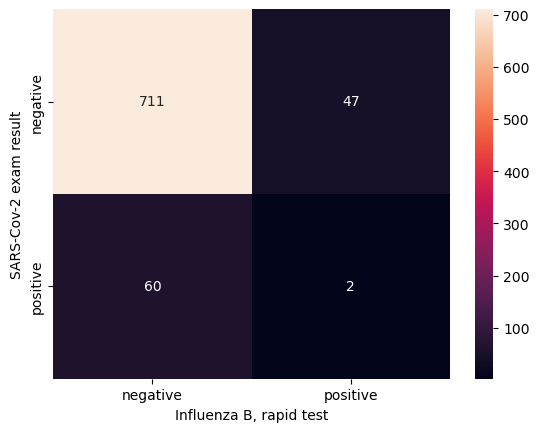

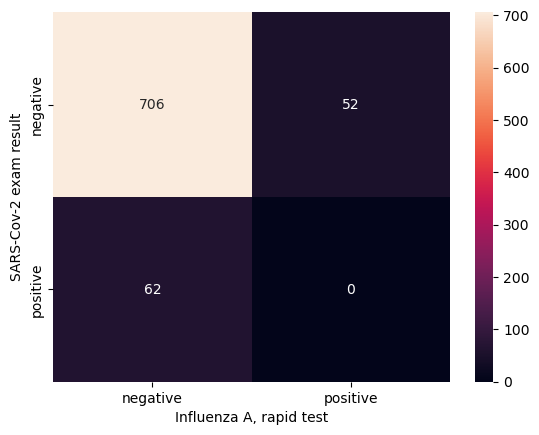

In [29]:
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'],df[col]),annot=True,fmt='d')

#### Analyse unpeu plus Avancee
##### Relation Variable /Variable
###### relation Taux Sanguin

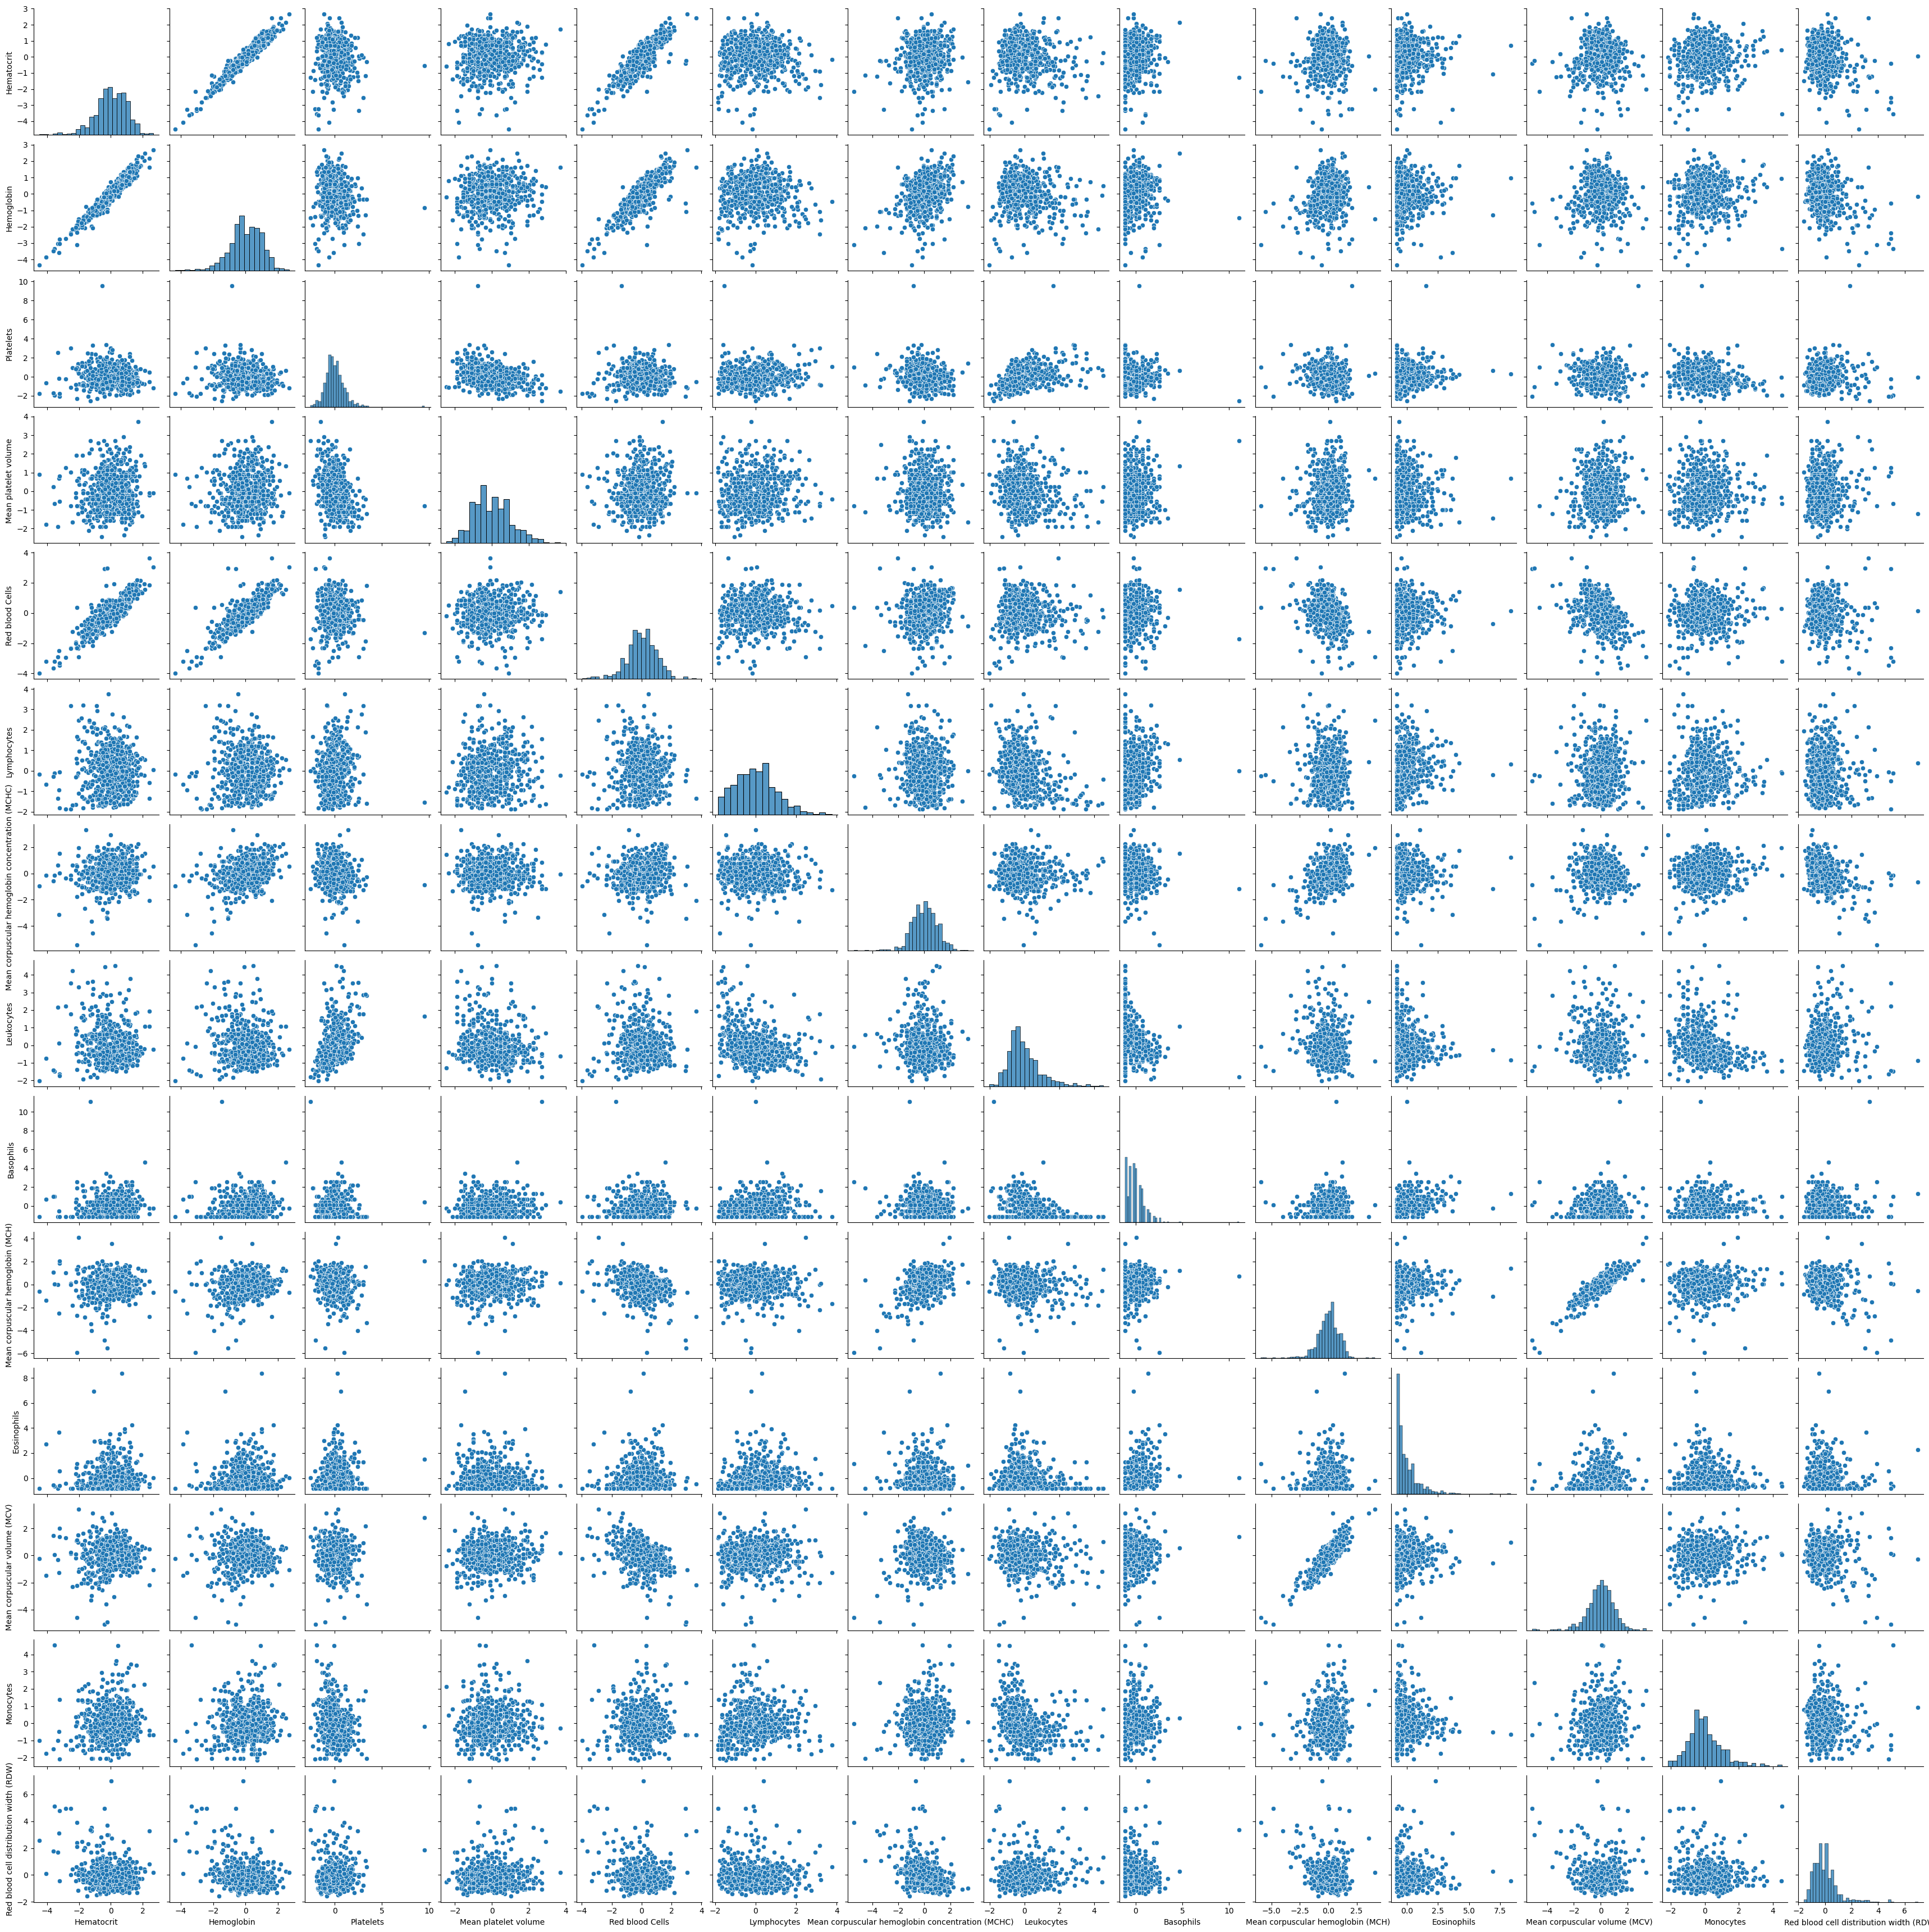

In [30]:
sns.pairplot(df[blood_columns])

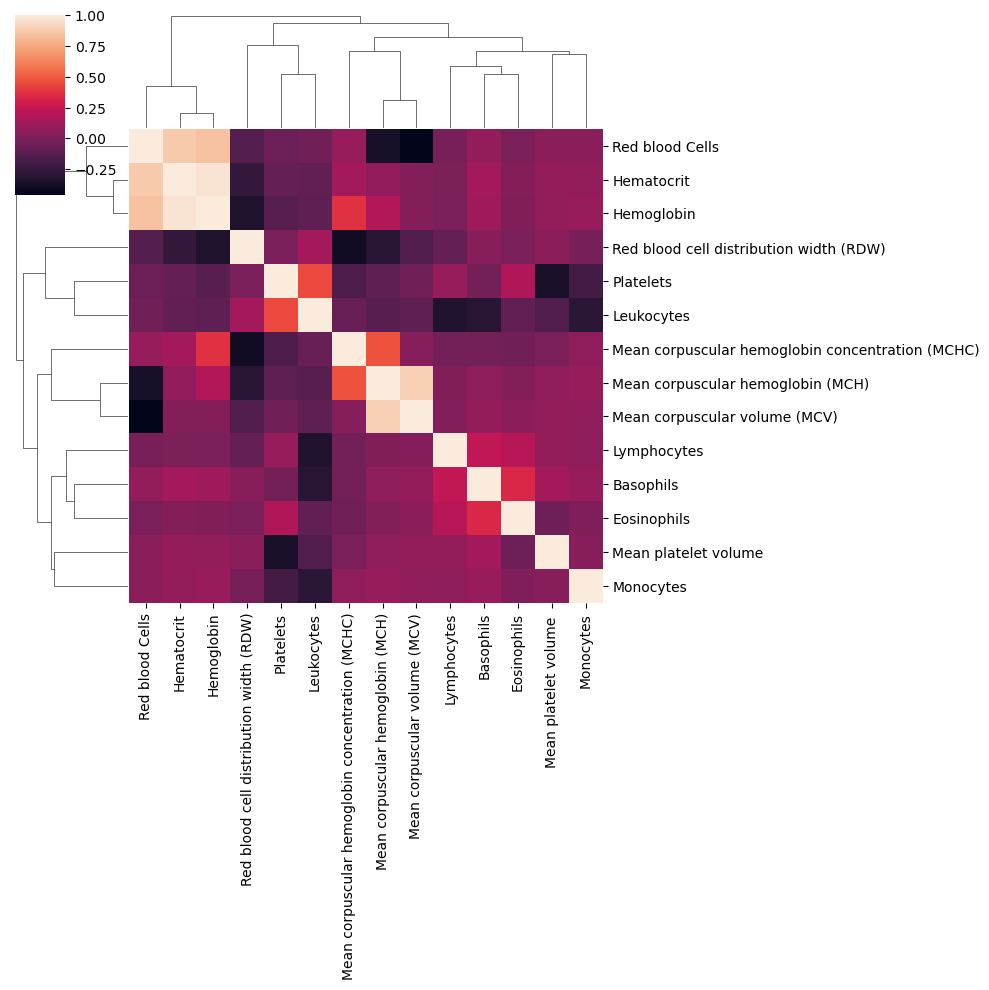

In [31]:
#  sns.heatmap(df[blood_columns].corr()) 
sns.clustermap(df[blood_columns].corr())

##### Relation Age / Sang

C:\Users\AD\AppData\Local\Temp\ipykernel_1316\3826989551.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


ValueError: could not convert string to float: 'negative'

<Figure size 640x480 with 0 Axes>

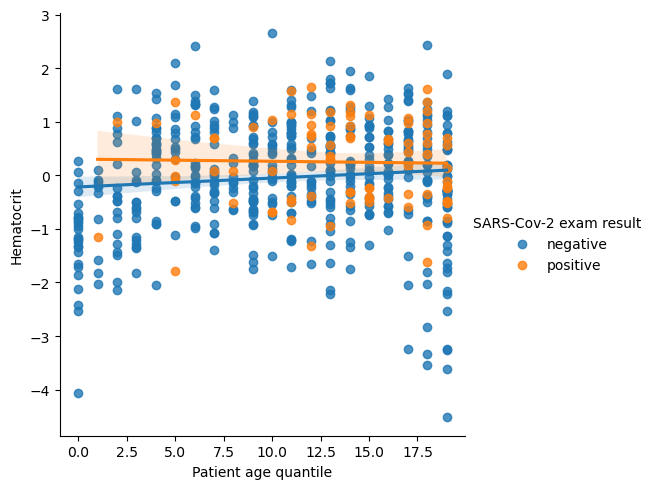

<Figure size 640x480 with 0 Axes>

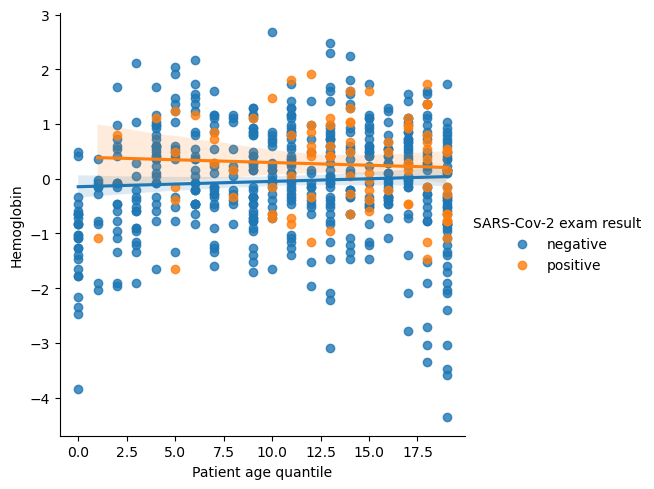

<Figure size 640x480 with 0 Axes>

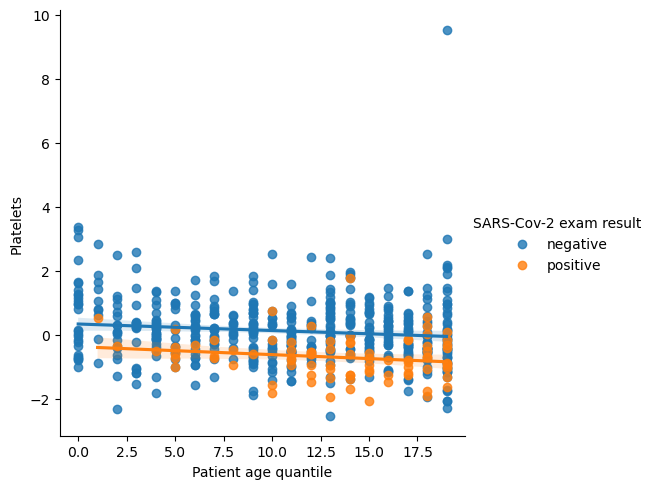

<Figure size 640x480 with 0 Axes>

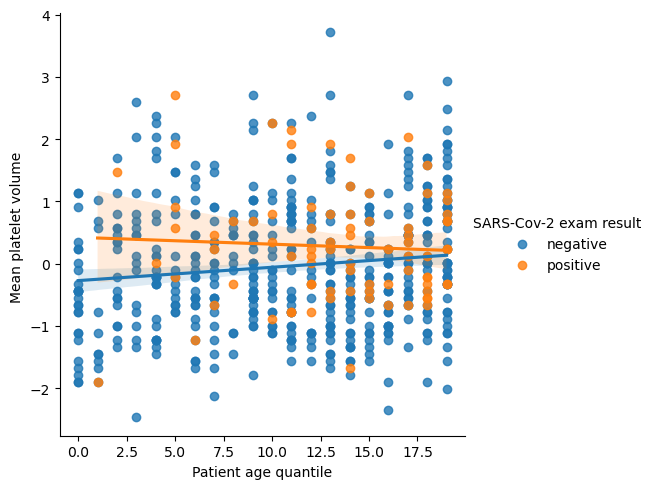

<Figure size 640x480 with 0 Axes>

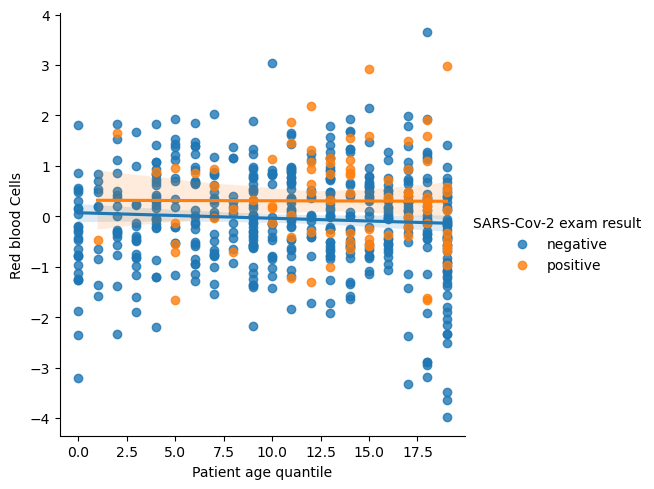

<Figure size 640x480 with 0 Axes>

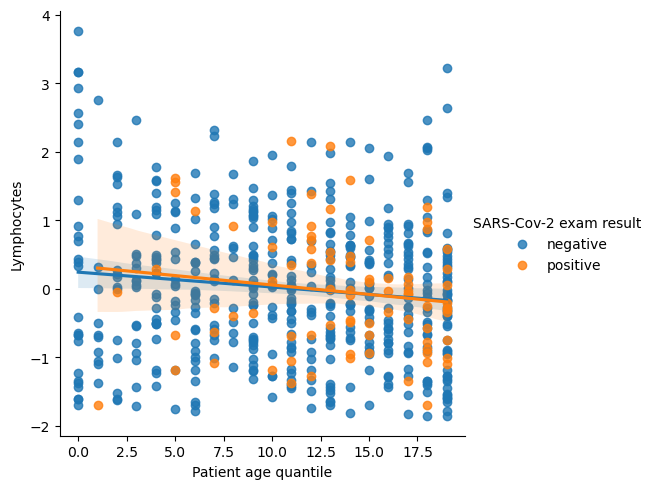

<Figure size 640x480 with 0 Axes>

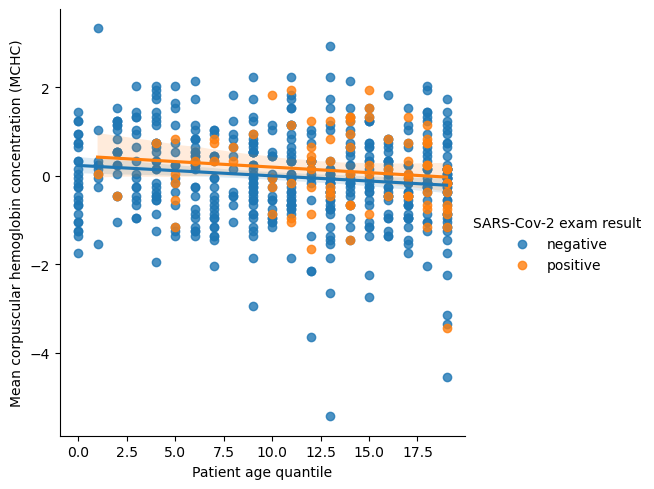

<Figure size 640x480 with 0 Axes>

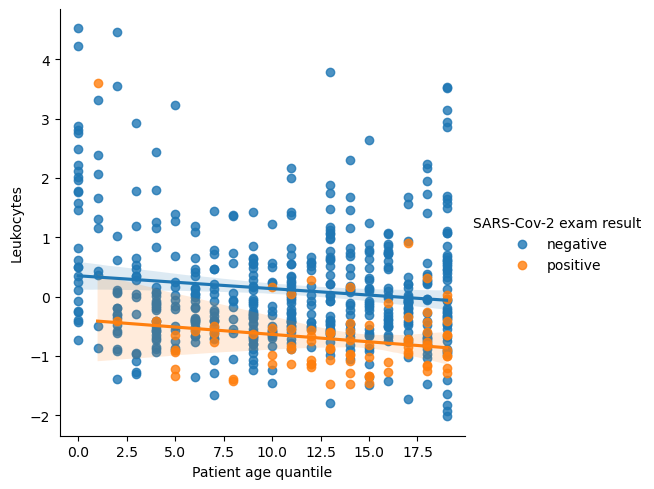

<Figure size 640x480 with 0 Axes>

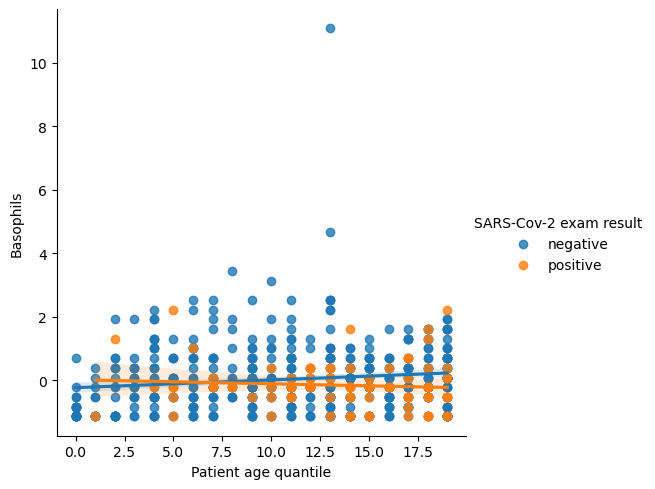

<Figure size 640x480 with 0 Axes>

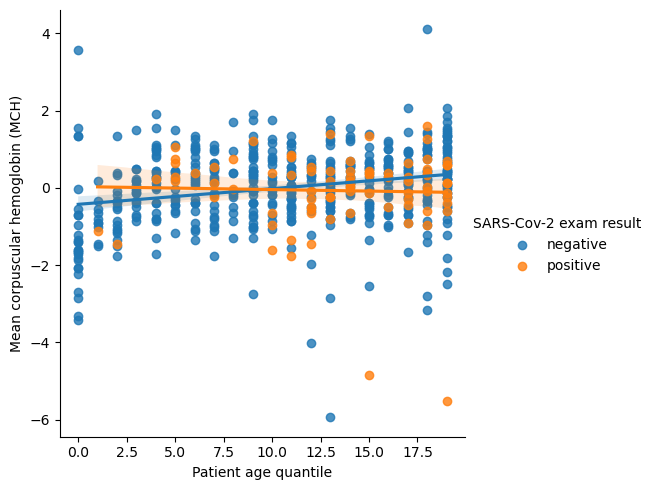

<Figure size 640x480 with 0 Axes>

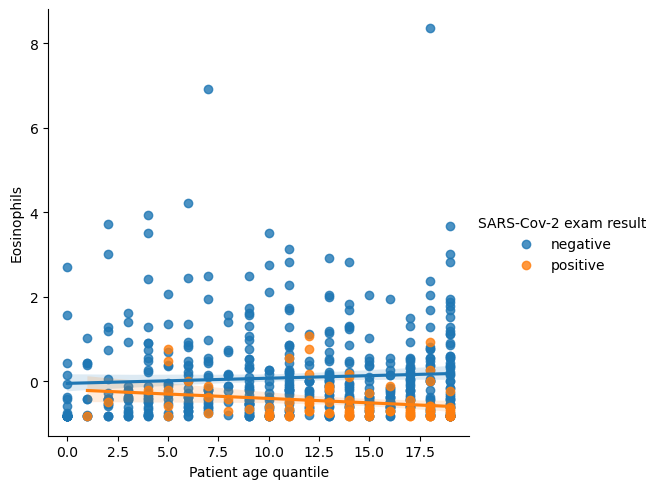

<Figure size 640x480 with 0 Axes>

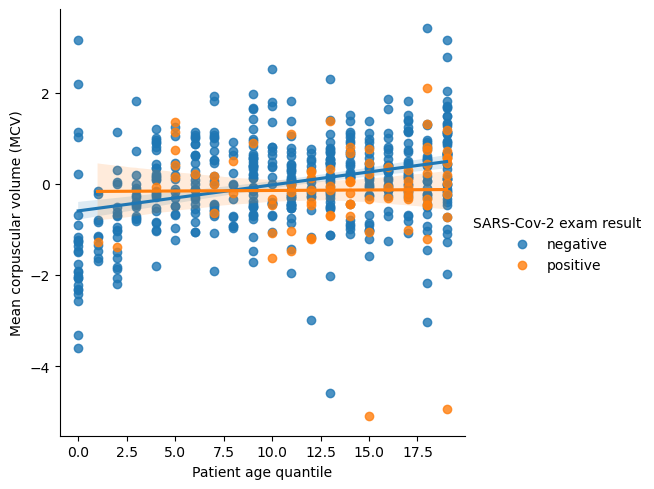

<Figure size 640x480 with 0 Axes>

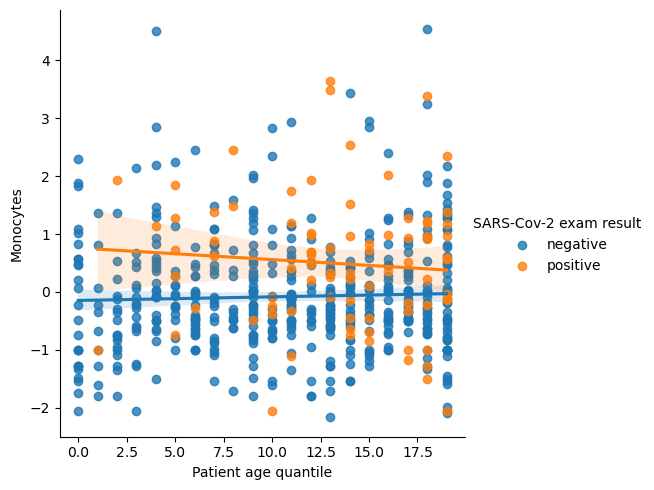

<Figure size 640x480 with 0 Axes>

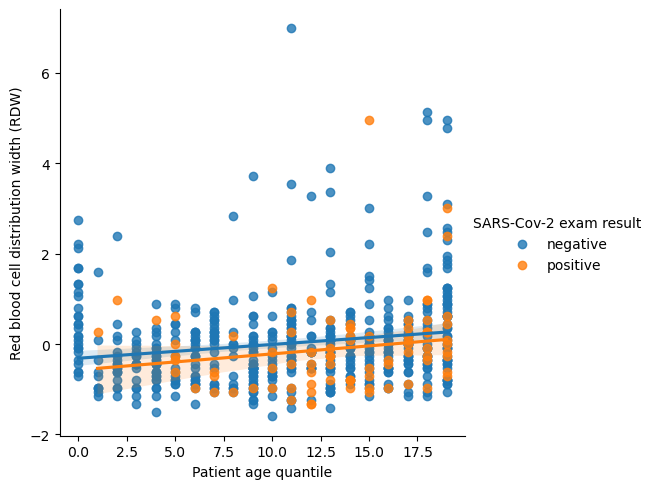

<Figure size 640x480 with 0 Axes>

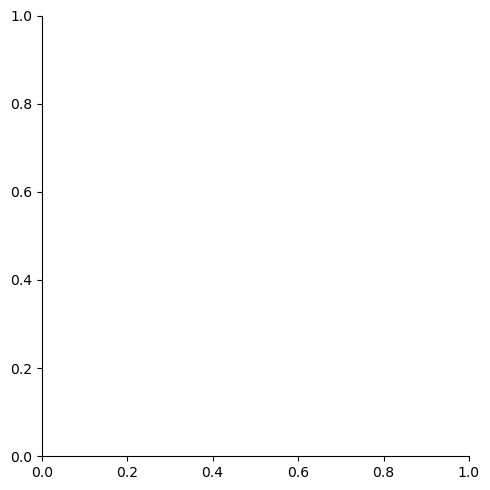

In [88]:
for col in blood_columns:
    plt.figure()
    sns.lmplot(x='Patient age quantile',y=col,hue='SARS-Cov-2 exam result',data=df)

In [33]:
df.corr()['Patient age quantile'].sort_values()

C:\Users\AD\AppData\Local\Temp\ipykernel_1316\476612201.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Patient age quantile'].sort_values()


Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

###### Relation entre Influenza et rapid test

In [34]:
pd.crosstab(df['Influenza A'],df['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [35]:
pd.crosstab(df['Influenza B'],df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

### Relation Viral /Sanguin
###### Creation d'une nouvelle variable "est malade"

In [36]:
df['est malade'] = np.sum(df[viral_columns[:-2]] == 'detected',axis=1)>= 1

In [37]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

In [38]:
malade_df = df[df['est malade'] == True]
non_malade_df = df[df['est malade'] == False]

C:\Users\AD\AppData\Local\Temp\ipykernel_1316\1109119302.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(malade_df[col],label='malade',kde=True)
C:\Users\AD\AppData\Local\Temp\ipykernel_1316\1109119302.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_malade_df[col],label='non malade',

C:\Users\AD\AppData\Local\Temp\ipykernel_1316\1109119302.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_malade_df[col],label='non malade',kde=True)
C:\Users\AD\AppData\Local\Temp\ipykernel_1316\1109119302.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(malade_df[col],label='malade',

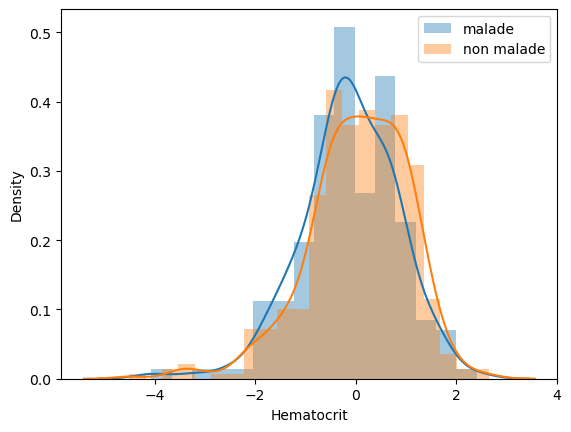

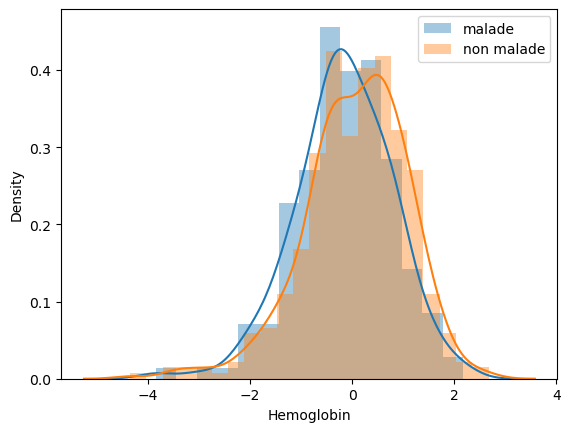

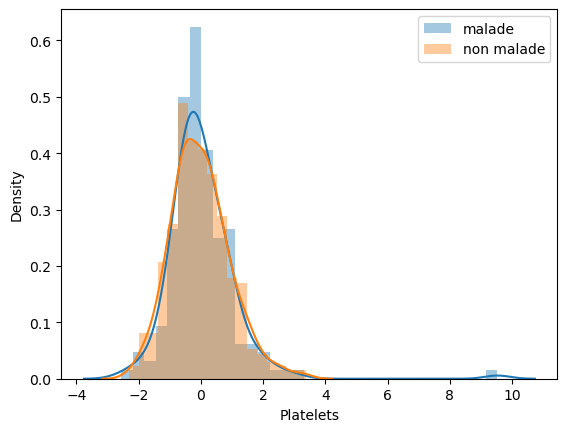

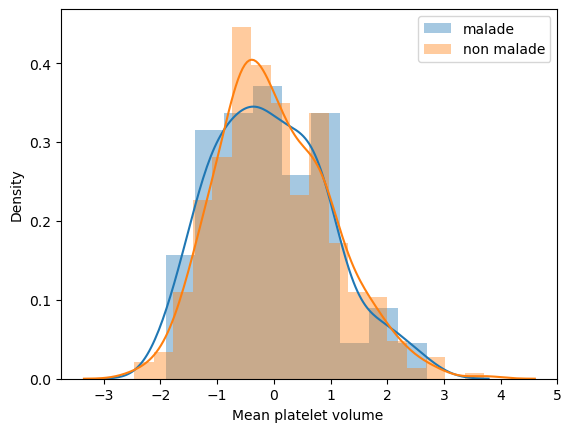

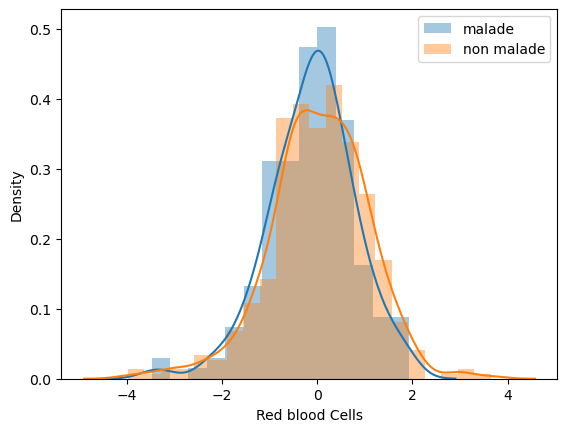

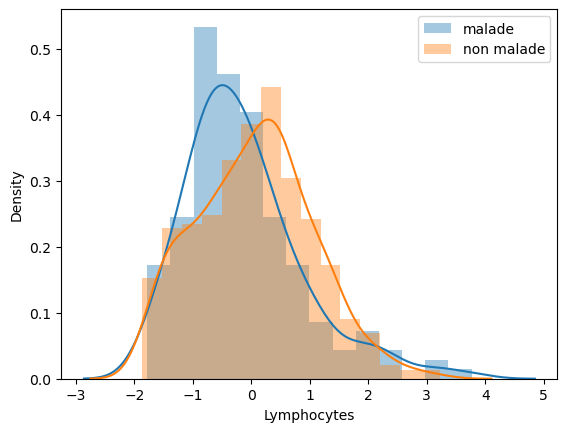

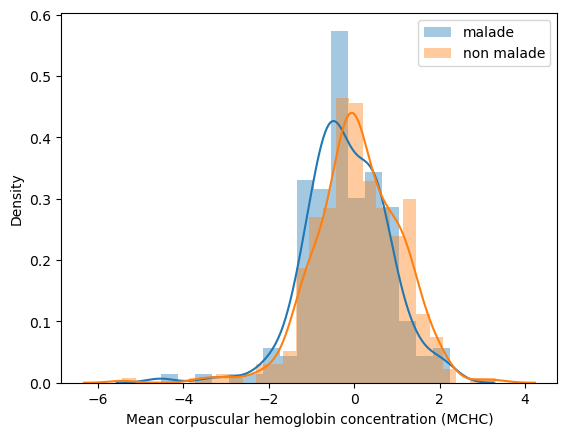

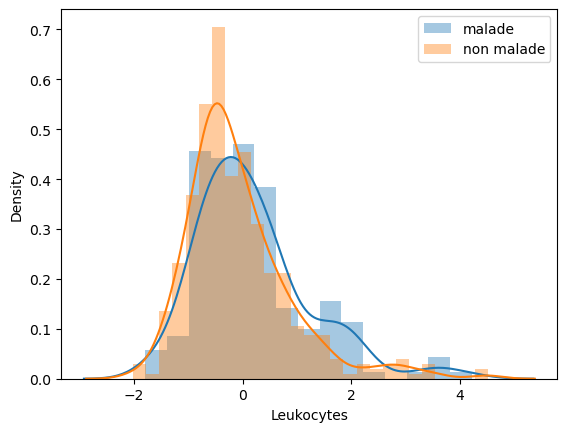

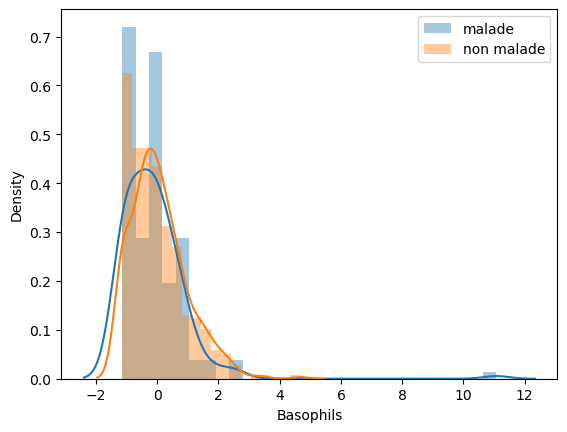

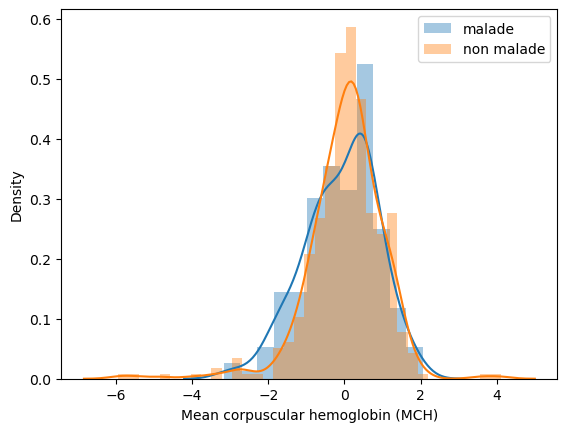

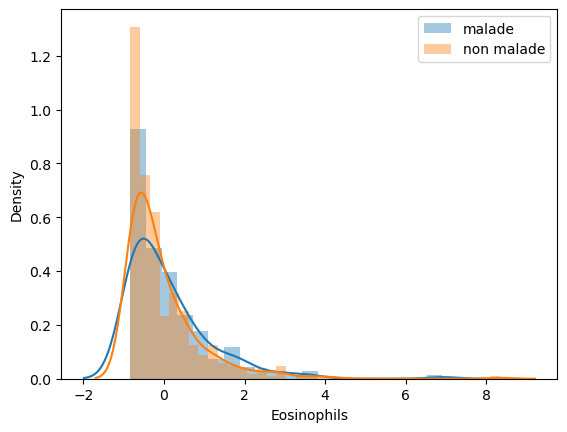

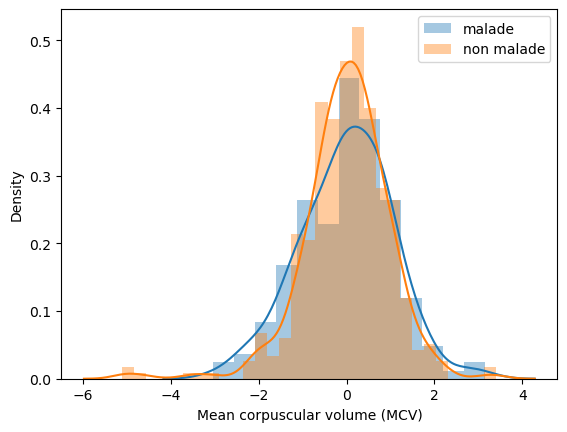

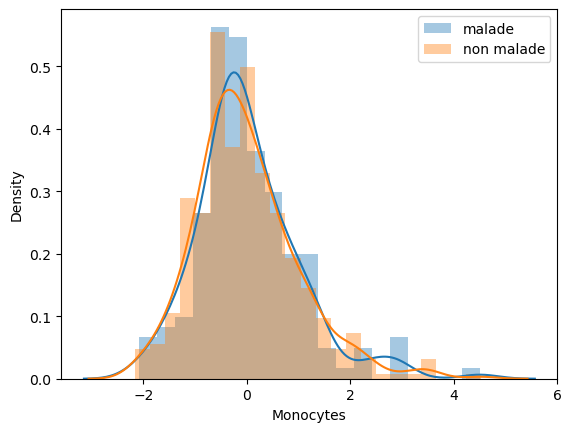

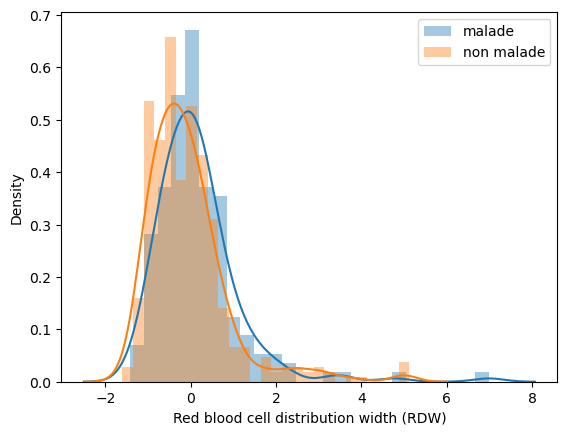

In [39]:
for col in blood_columns:
    plt.figure()
    sns.distplot(malade_df[col],label='malade',kde=True)
    sns.distplot(non_malade_df[col],label='non malade',kde=True)
    plt.legend()

In [40]:
def hospitalisation(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)'] ==1:
        return 'surveillance'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] ==1:
        return 'soins semi-intensives'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1 :
        return 'soins intensifs'
    else : 
        return 'inconnu'

In [41]:
df['statut'] =df.apply(hospitalisation,axis=1)

In [42]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

C:\Users\AD\AppData\Local\Temp\ipykernel_1316\2487062650.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['statut'] == cat][col],label=cat)
C:\Users\AD\AppData\Local\Temp\ipykernel_1316\2487062650.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['statut'] == cat][col],label=cat

C:\Users\AD\AppData\Local\Temp\ipykernel_1316\2487062650.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['statut'] == cat][col],label=cat)
C:\Users\AD\AppData\Local\Temp\ipykernel_1316\2487062650.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['statut'] == cat][col],label=cat

C:\Users\AD\AppData\Local\Temp\ipykernel_1316\2487062650.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['statut'] == cat][col],label=cat)
C:\Users\AD\AppData\Local\Temp\ipykernel_1316\2487062650.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['statut'] == cat][col],label=cat

C:\Users\AD\AppData\Local\Temp\ipykernel_1316\2487062650.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['statut'] == cat][col],label=cat)
C:\Users\AD\AppData\Local\Temp\ipykernel_1316\2487062650.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['statut'] == cat][col],label=cat

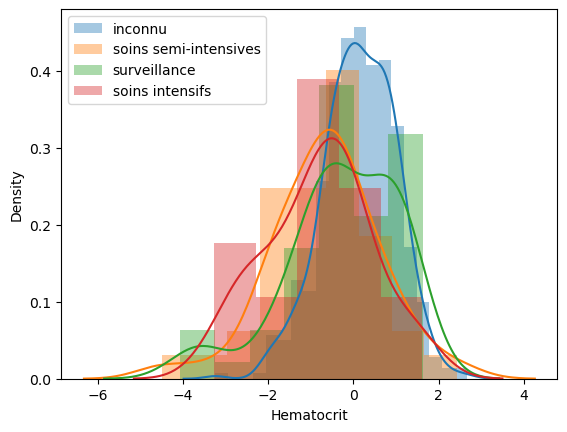

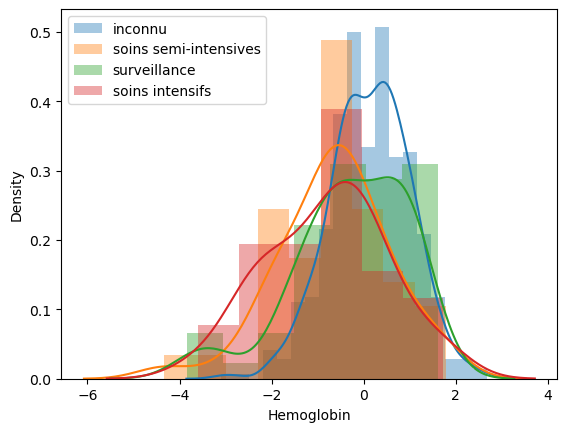

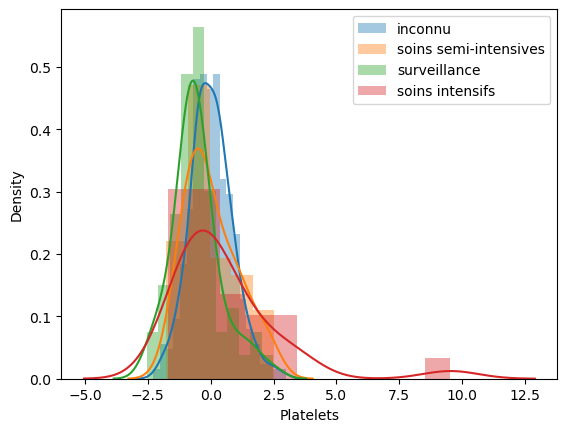

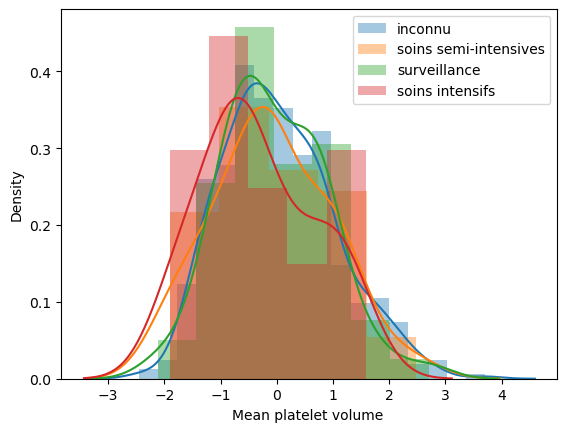

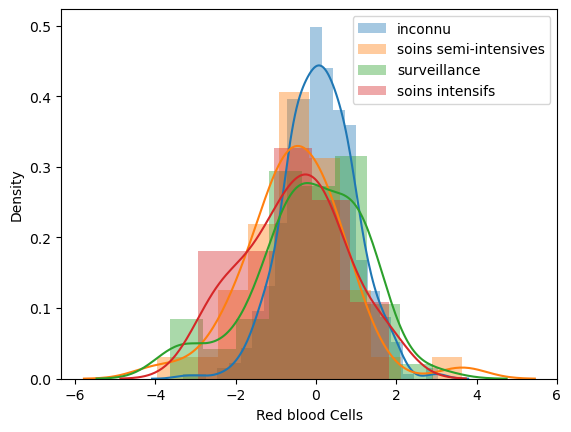

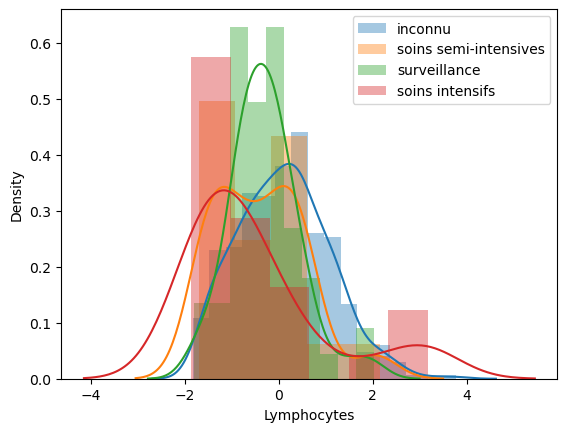

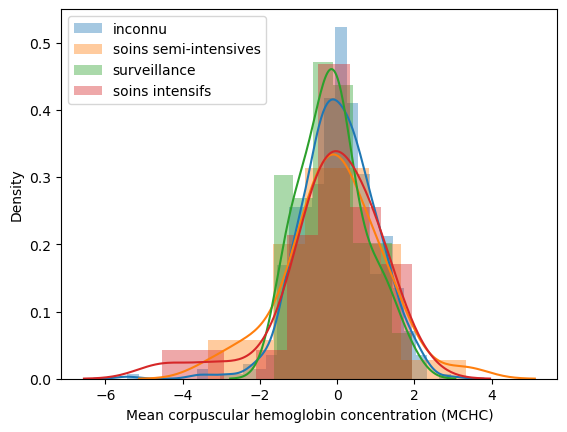

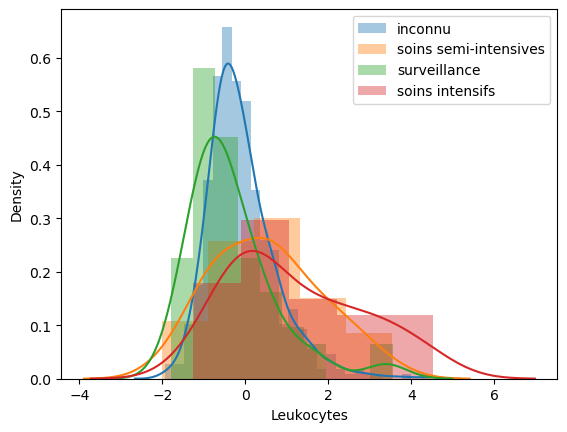

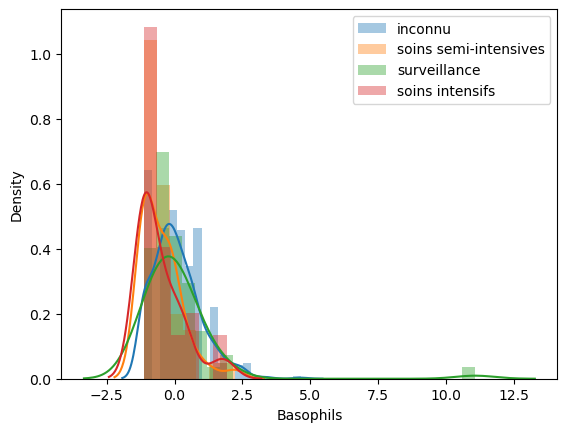

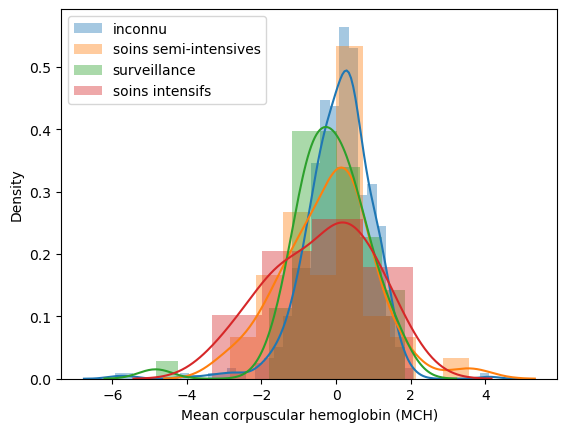

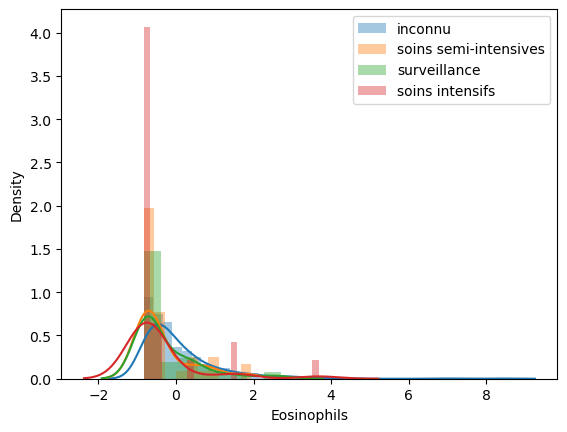

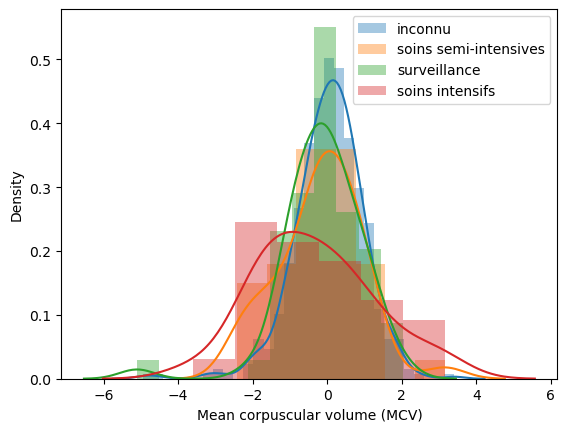

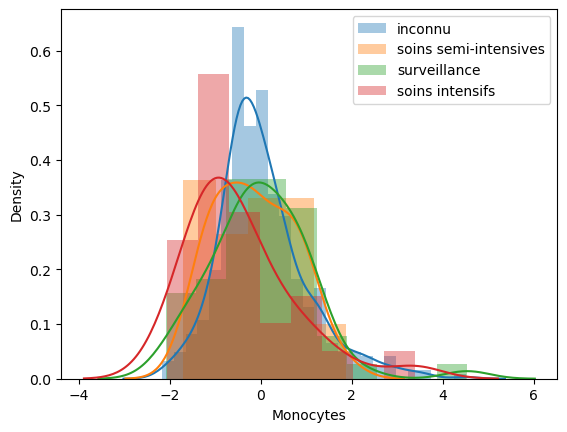

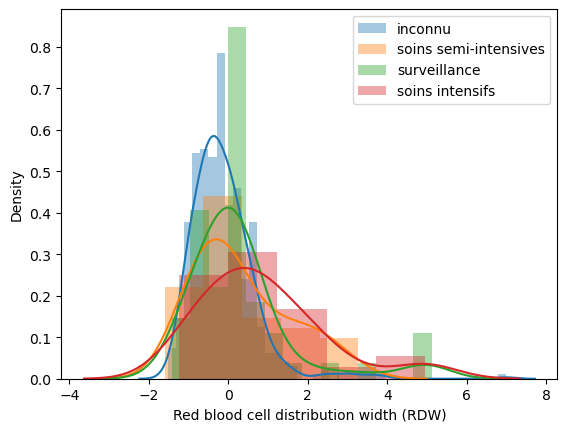

In [43]:
for col in blood_columns:
    plt.figure()
    for cat in df['statut'].unique():
        sns.distplot(df[df['statut'] == cat][col],label=cat)
    plt.legend()
    

In [44]:
df[blood_columns].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [45]:
df[viral_columns].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

In [46]:
df.dropna().count()

Patient age quantile                                     99
SARS-Cov-2 exam result                                   99
Patient addmited to regular ward (1=yes, 0=no)           99
Patient addmited to semi-intensive unit (1=yes, 0=no)    99
Patient addmited to intensive care unit (1=yes, 0=no)    99
Hematocrit                                               99
Hemoglobin                                               99
Platelets                                                99
Mean platelet volume                                     99
Red blood Cells                                          99
Lymphocytes                                              99
Mean corpuscular hemoglobin concentration (MCHC)         99
Leukocytes                                               99
Basophils                                                99
Mean corpuscular hemoglobin (MCH)                        99
Eosinophils                                              99
Mean corpuscular volume (MCV)           

In [90]:
df1 =df[viral_columns[:-2]]
df1['covid'] =df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)

C:\Users\AD\AppData\Local\Temp\ipykernel_1316\2743301399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['covid'] =df['SARS-Cov-2 exam result']


negative    0.91716
positive    0.08284
Name: covid, dtype: float64

In [48]:
df1 =df[blood_columns[:-2]]
df1['covid'] =df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)

C:\Users\AD\AppData\Local\Temp\ipykernel_1316\3782776318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['covid'] =df['SARS-Cov-2 exam result']


negative    0.864775
positive    0.135225
Name: covid, dtype: float64

In [49]:
from scipy.stats import ttest_ind

In [50]:
positive_df.shape

(558, 38)

In [51]:
negative_df.shape

(5086, 38)

In [52]:
balanced_neg=negative_df.sample(positive_df.shape[0])

In [53]:
def t_test(col):
    alpha=0.02
    stat,p=ttest_ind(balanced_neg[col].dropna(),positive_df[col].dropna())
    if p< alpha:
        return 'H0 Rejetee'
    else:
        return 0

In [54]:
for col in blood_columns:
    print(f'{col:-<50}{t_test(col)}')

Hematocrit----------------------------------------0
Hemoglobin----------------------------------------0
Platelets-----------------------------------------H0 Rejetee
Mean platelet volume -----------------------------0
Red blood Cells-----------------------------------0
Lymphocytes---------------------------------------0
Mean corpuscular hemoglobin concentration (MCHC)--0
Leukocytes----------------------------------------H0 Rejetee
Basophils-----------------------------------------0
Mean corpuscular hemoglobin (MCH)-----------------0
Eosinophils---------------------------------------H0 Rejetee
Mean corpuscular volume (MCV)---------------------0
Monocytes-----------------------------------------H0 Rejetee
Red blood cell distribution width (RDW)-----------0


##### PRE-PROCESSING

In [55]:
df =data.copy()
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

##### Creation des sous-ensembles (suite au EDA)

In [56]:
missing_rate = df.isna().sum()/df.shape[0]

In [57]:
blood_columns = list(df.columns[(missing_rate <0.9) & (missing_rate >0.8)])
viral_columns = list(df.columns[(missing_rate <0.8) & (missing_rate >0.75)])

In [58]:
key_columns = ['Patient age quantile','SARS-Cov-2 exam result']

In [59]:
df =df[key_columns + blood_columns + viral_columns]
df.head()

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13               negative         NaN         NaN   
1                    17               negative    0.236515    -0.02234   
2                     8               negative         NaN         NaN   
3                     5               negative         NaN         NaN   
4                    15               negative         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   
1  -0.517413               0.010677         0.102004     0.318366   
2        NaN                    NaN              NaN          NaN   
3        NaN                    NaN              NaN          NaN   
4        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Influenza B, rapid test  \
0                                      NaN                     NaN   
1                                -0.625073                negative   
2                                      NaN                     NaN   
3                                      NaN                     NaN   
4                                      NaN                     NaN   

  Influenza A, rapid test Respiratory Syncytial Virus   Influenza A  \
0                     NaN                         NaN           NaN   
1                negative                not_detected  not_detected   
2                     NaN                         NaN           NaN   
3                     NaN                         NaN           NaN   
4                     NaN                not_detected  not_detected   

    Influenza B Parainfluenza 1 CoronavirusNL63 Rhinovirus/Enterovirus  \
0           NaN             NaN             NaN                    NaN   
1  not_detected    not_detected    not_detected               detected   
2           NaN             NaN             NaN                    NaN   
3           NaN             NaN             NaN                    NaN   
4  not_detected    not_detected    not_detected               detected   

  Coronavirus HKU1 Parainfluenza 3 Chlamydophila pneumoniae    Adenovirus  \
0              NaN             NaN                      NaN           NaN   
1     not_detected    not_detected             not_detected  not_detected   
2              NaN             NaN                      NaN           NaN   
3              NaN             NaN                      NaN           NaN   
4     not_detected    not_detected             not_detected  not_detected   

  Parainfluenza 4 Coronavirus229E CoronavirusOC43 Inf A H1N1 2009  \
0             NaN             NaN             NaN             NaN   
1    not_detected    not_detected    not_detected    not_detected   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN       

### TrainTest-Nettoyage-Encodage

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
trainset,testset =train_test_split(df,test_size=0.2,random_state=0)

In [62]:
trainset['SARS-Cov-2 exam result'].value_counts()

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [63]:
testset['SARS-Cov-2 exam result'].value_counts()

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

### Encodage

In [64]:
code ={'positive':1,'negative':0,'detected' :1,'not_detected':0}

In [91]:
def encodage(df):
    code ={'positive':1,
           'negative':0,
           'detected' :1,
           'not_detected':0}
    for col in df.select_dtypes('object'):
        df[col]=df[col].map(code)
        
    return df

In [92]:
def feature_engineering(df):
    df['est malade']=df[viral_columns].sum(axis=1)>=1
    df =df.drop(viral_columns,axis=1)
    return df

In [93]:
# def imputation(df):
#     return df.dropna(axis=0)
def imputation(df):
    df['is na'] = df['Parainfluenza 3'].isna()
    return df.fillna(-999)

In [94]:
def preprocessing(df):
    df = encodage(df)
    feature_engineering(df)
    df =imputation(df)
    
    X = df.drop('SARS-Cov-2 exam result',axis=1)
    y=df['SARS-Cov-2 exam result']
    
    print(y.value_counts())
    
    return X,y

In [95]:
X_train,y_train =preprocessing(trainset)

0    4068
1     447
Name: SARS-Cov-2 exam result, dtype: int64


In [96]:
X_test,y_test =preprocessing(testset)

0    1018
1     111
Name: SARS-Cov-2 exam result, dtype: int64


##### Modelisation 

In [97]:
# arbre decissionel
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import PolynomialFeatures,StandardScaler #exponentiel 
from sklearn.decomposition import PCA

In [98]:
#model =make_pipeline(PolynomialFeatures(2), SelectKBest(f_classif,k=5),RandomForestClassifier(random_state=0))
#model = DecisionTreeClassifier(random_state=0)
preprocessor =make_pipeline(PolynomialFeatures(2,include_bias=False), SelectKBest(f_classif,k=5))

In [99]:
RandomForest = make_pipeline(preprocessor,RandomForestClassifier(random_state=0))
AdaBoost =make_pipeline(preprocessor,AdaBoostClassifier(random_state=0))
SVM =make_pipeline(preprocessor,StandardScaler(), SVC(random_state=0))
KNN =make_pipeline(preprocessor,StandardScaler(), KNeighborsClassifier())

In [100]:
list_of_models ={'RandomForest':RandomForest,'AdaBoost':AdaBoost
                 ,'SVM':SVM,'KNN':KNN}

In [101]:
#### Procedure D'evaluation

from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.model_selection import learning_curve
import numpy as np

In [102]:
def evaluation(model):
    model.fit(X_train, y_train)
    ypred =model.predict(X_test)
    
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    
    
    N,train_score,val_score =learning_curve(model,X_train,y_train
                                           ,cv=4,scoring='f1',train_sizes=np.linspace(0.1,1,10))
    
    plt.figure(figsize=(12,8))
    plt.plot(N,train_score.mean(axis=1),label='train score')
    plt.plot(N,val_score.mean(axis=1),label='validation score')
    plt.legend()

RandomForest
[[1018    0]
 [ 111    0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1018
           1       0.00      0.00      0.00       111

    accuracy                           0.90      1129
   macro avg       0.45      0.50      0.47      1129
weighted avg       0.81      0.90      0.86      1129



C:\Users\AD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AD\anaconda3\lib\site-packages\sklearn\feature_selectio

AdaBoost
[[1018    0]
 [ 111    0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1018
           1       0.00      0.00      0.00       111

    accuracy                           0.90      1129
   macro avg       0.45      0.50      0.47      1129
weighted avg       0.81      0.90      0.86      1129



C:\Users\AD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AD\anaconda3\lib\site-packages\sklearn\feature_selectio

SVM
[[1018    0]
 [ 111    0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1018
           1       0.00      0.00      0.00       111

    accuracy                           0.90      1129
   macro avg       0.45      0.50      0.47      1129
weighted avg       0.81      0.90      0.86      1129



C:\Users\AD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AD\anaconda3\lib\site-packages\sklearn\feature_selectio

KNN
[[1018    0]
 [ 111    0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1018
           1       0.00      0.00      0.00       111

    accuracy                           0.90      1129
   macro avg       0.45      0.50      0.47      1129
weighted avg       0.81      0.90      0.86      1129



C:\Users\AD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AD\anaconda3\lib\site-packages\sklearn\feature_selectio

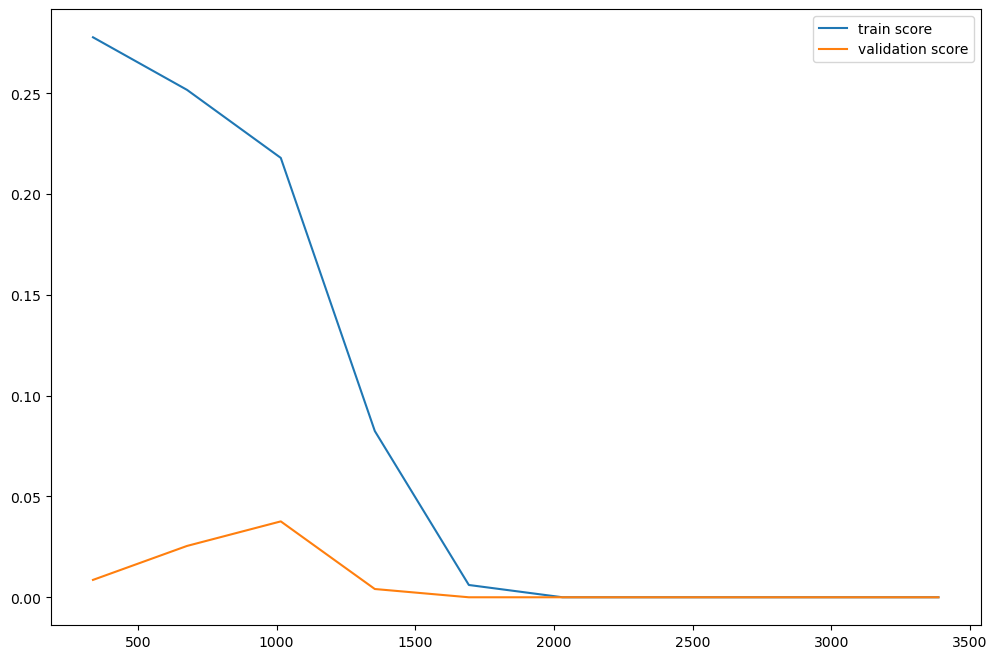

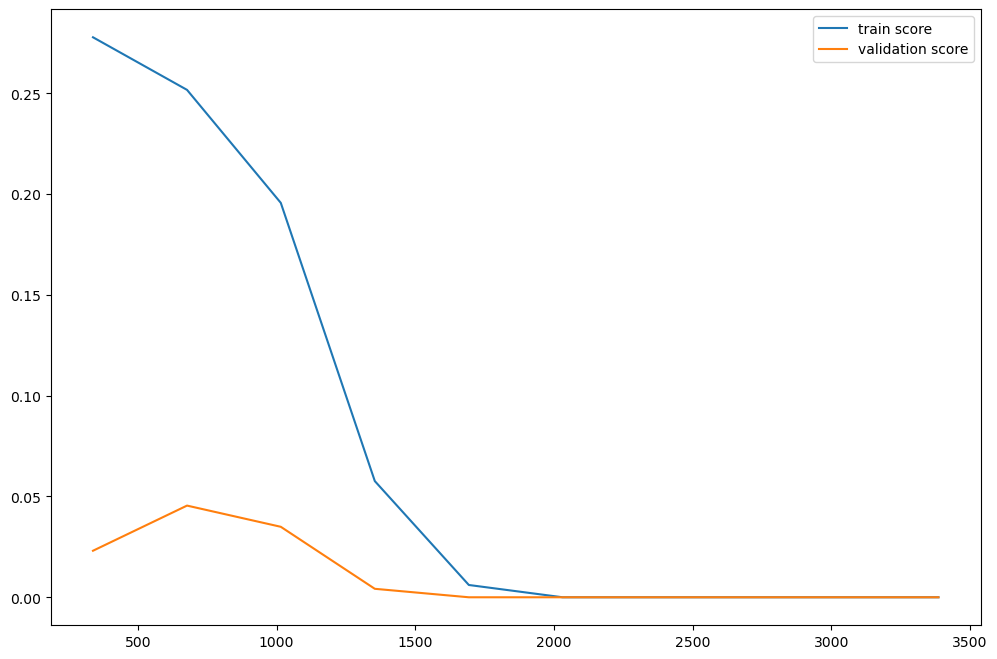

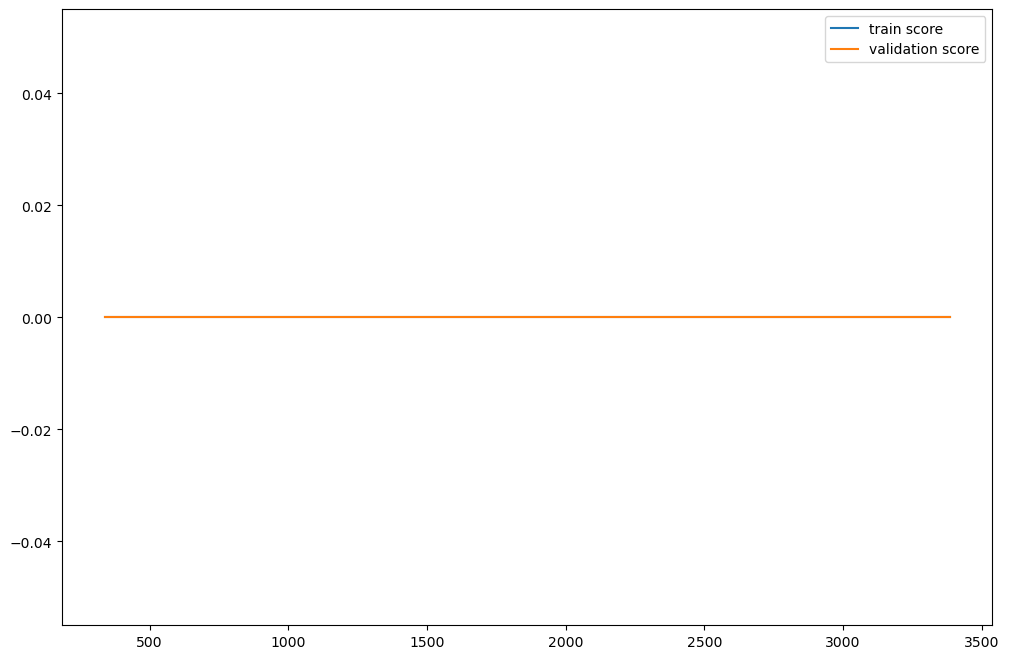

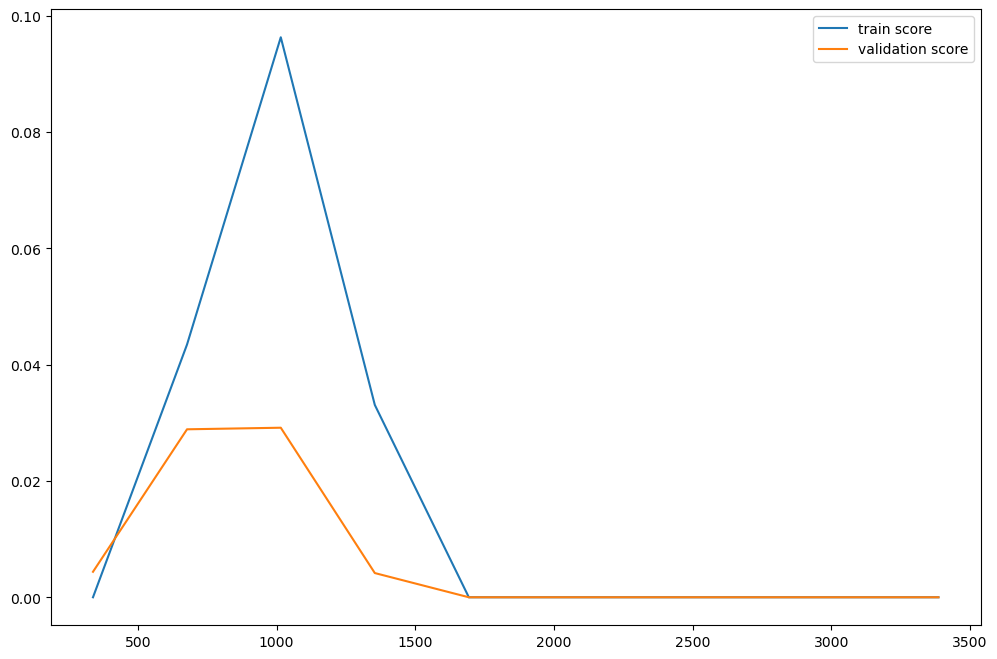

In [77]:
for name, model in list_of_models.items():
    print(name)
    evaluation(model)

In [78]:
model_1 =RandomForestClassifier(random_state=0)

#### Procedure D'evaluation

In [79]:
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.model_selection import learning_curve
import numpy as np

In [80]:
def evaluation(model):
    model.fit(X_train, y_train)
    ypred =model.predict(X_test)
    
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    
    
    N,train_score,val_score =learning_curve(model,X_train,y_train
                                           ,cv=4,scoring='f1',train_sizes=np.linspace(0.1,1,10))
    
    plt.figure(figsize=(12,8))
    plt.plot(N,train_score.mean(axis=1),label='train score')
    plt.plot(N,val_score.mean(axis=1),label='validation score')
    plt.legend()
    

[[1018    0]
 [ 111    0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1018
           1       0.00      0.00      0.00       111

    accuracy                           0.90      1129
   macro avg       0.45      0.50      0.47      1129
weighted avg       0.81      0.90      0.86      1129



C:\Users\AD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AD\anaconda3\lib\site-packages\sklearn\feature_selectio

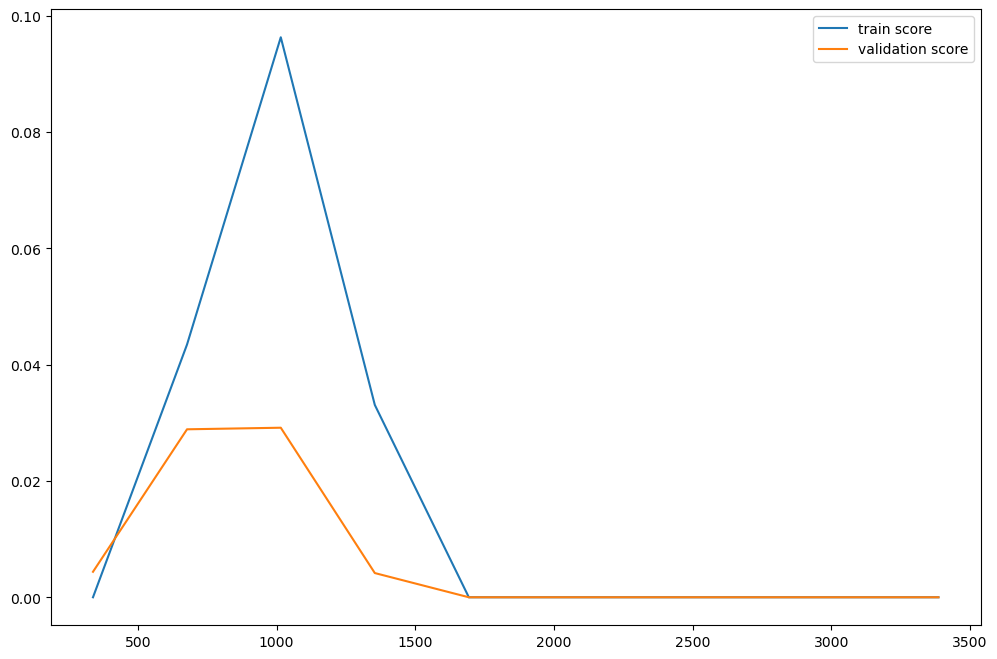

In [81]:
evaluation(model)

In [82]:
#pd.DataFrame(model.feature_importances_,index=X_train.columns).plot.bar(figsize=(12,8))

#### OPTIMISATION

In [83]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [84]:
SVM

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest(k=5))])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [2]:
hyper_params ={'svc__gamma':[1e-3,1e-4],
               'svc__C':[1,10,100,100],
              'pipeline__polynomialfeatures__degree':[2,3,4],
              'pipeline__selectkbest__k':range(4,10)}

In [ ]:
# grid =GridSearchCV(SVM,hyper_params,scoring='recall',cv=4)
grid =RandomizedSearchCV(SVM,hyper_params,scoring='recall',cv=4,n_iter=4)


grid.fit(X_train,y_train)
print(grid.best_params_)

y_pred =grid.predict(X_test)

print(classification_report(y_test,y_pred))

In [ ]:
evaluation(grid.best_estimator_)

### Precision Recall Curve

In [ ]:
from sklearn.metrics import precison_recall_curve

In [ ]:
precision,recall,theshold =precison_recall_curve(y_test,grid.best_estimator_.decision_function(X_test))

In [ ]:
plt.plot(theshold,precision[:-1],label='precision')
plt.plot(theshold,recall[:-1],label='recall')
plt.legend()

In [ ]:
def model_final(model,X,treshold=0):
    return model.decision_function(X)>threshold

In [ ]:
y_pred =model_final(grid.best_estimator_,X_test,treshold=-1)

In [1]:
from sklearn.metrics import recall_score

In [ ]:
f1_score(y_test,y_pred)

In [ ]:
recall_score(y_test,y_pred)